In [ ]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_auc_score, f1_score,cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import statistics
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
import warnings
from collections import Counter
from imblearn.under_sampling import NearMiss
from numpy import where
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data =pd.read_csv('/content/drive/My Drive/NAFLD.csv')
data.head(5)

,Sex,Age,Sistolic,Diastolic,Height,Weight,Waistcircumference,Hipcircumference,BMI,Marriage_Status_Name,...,PLT_LBS,Ferritin_LBS,FBS_LBS,HbA1c_LBS,BUN_LBS,Cr_LBS,SGOT_LBS,SGPT_LBS,Alkph_LBS,UricAcid_LBS
0,F,30,999,99,168,115,121,134,41,Married,...,351,16,100,6,9,1,19,21,128,7
1,M,24,130,70,174,140,146,137,46,Married,...,255,59,86,5,11,1,18,19,209,6
2,F,42,120,80,167,90,105,116,32,Married,...,203,12,152,8,13,1,14,20,219,4
3,F,46,110,70,165,121,118,140,44,Married,...,381,40,102,6,40,1,10,16,201,8
4,F,33,120,80,154,118,118,146,50,Married,...,288,15,91,6,9,1,22,32,133,5


In [ ]:
data= data.rename(columns={'FattyLiver_LBS': 'target'})

In [ ]:
#Data Preparation for Categorical and Numerical columns
#Categorical columns
s = (data.dtypes == 'object')
cols = list(s[s].index)
# Change types of Categorical columns with OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)
cat_names=[]
for i in range(73):
  cat_names.append(str(i))
pre_df = pd.DataFrame(ohe.fit_transform(data[cols]))
names= ohe.get_feature_names()
pre_df.columns= pre_df.columns.astype(str)
pre_df = pre_df.rename(columns={'FattyLiver_LBS': 'target'})

for i in range(73):
  pre_df.rename(columns={cat_names[i]: names[i]}, inplace= True)
for i in range(len(pre_df.columns)):
  print (pre_df.columns[i])
#Numerical columns
# scale the numerical columns using StandardScaler
scaler = StandardScaler()
# transform data
x=cols
x.append('target')
scaled = scaler.fit_transform(data.drop(x,axis=1))
scaled_names= []
for i in range(20):
  scaled_names.append(str(i))
scaled_true_names=  scaler.get_feature_names_out()
scaled_df= pd.concat([pre_df,pd. DataFrame(scaled),data['target']],axis=1)
scaled_df.columns= scaled_df.columns.astype(str)
for i in range(20):
  scaled_df.rename(columns={scaled_names[i]: scaled_true_names[i]}, inplace= True)
for i in range(len(scaled_df.columns)):
  print (scaled_df.columns[i])

x0_F
x0_M
x1_Divorced
x1_Married
x1_Single
x1_Widow
x2_Doctorate
x2_Graduate
x2_High School Diploma
x2_Master's Degree
x2_Primary Education
x2_Secondary Education
x2_Undergraduate
x2_Uneducated
x3_EX-Smoker
x3_Never Smoked
x3_Occasional Smoker
x3_Rare Smoker
x3_Smoker
x4_No
x4_Yes
x5_No
x5_Yes
x6_No
x6_Yes
x7_No
x7_Yes
x8_No
x8_Yes
x9_No
x9_Yes
x10_No
x10_Yes
x11_No
x11_Yes
x12_No
x12_Yes
x13_No
x13_Yes
x14_No
x14_Yes
x15_No
x15_Yes
x16_No
x16_Yes
x17_No
x17_Yes
x18_No
x18_Yes
x19_No
x19_Yes
x20_No
x20_Yes
x21_No
x21_Yes
x22_No
x22_Yes
x23_No
x23_Yes
x24_No
x24_Yes
x25_No
x25_Yes
x26_No
x26_Yes
x27_No
x27_Yes
x28_Never
x28_Once
x28_Twice or more
x29_Never
x29_Once
x29_Twice or more
x0_F
x0_M
x1_Divorced
x1_Married
x1_Single
x1_Widow
x2_Doctorate
x2_Graduate
x2_High School Diploma
x2_Master's Degree
x2_Primary Education
x2_Secondary Education
x2_Undergraduate
x2_Uneducated
x3_EX-Smoker
x3_Never Smoked
x3_Occasional Smoker
x3_Rare Smoker
x3_Smoker
x4_No
x4_Yes
x5_No
x5_Yes
x6_No
x6_Yes
x

In [ ]:
unscaled_df= pd.concat([pre_df,data.drop(cols,axis=1),data['target']],axis=1)

In [ ]:
# dealing with imbalanced data using NearMiss method which is an undersampling method

undersample = NearMiss(version=2)
# transform the dataset
X, y = undersample.fit_resample(unscaled_df.drop('target',axis=1), unscaled_df['target'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2) # 80% training and 20% test
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({1: 627, 0: 627})


Mean Accuracy for the 10 iterations is: 0.8566878980891721
Mean Precision for the 10 iterations is: 0.8375
Mean Recall for the 10 iterations is: 0.8758169934640524
Mean F1 score for the 10 iterations is: 0.856230031948882
Mean AUC for the 10 iterations is: 0.9221775666788454
Mean Precision score for 0 category is: 0.8766233766233766
Mean Precision score for 1 category is: 0.8375
Mean Recall score for 0 category is: 0.8385093167701865
Mean Recall score for 1 category is: 0.8758169934640524
Mean F1 score score for 0 category is: 0.8571428571428571
Mean F1 score score for 1 category is: 0.856230031948882
 Accuracy is : 0.856687898089172
[[135  26]
 [ 19 134]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       161
           1       0.84      0.88      0.86       153

    accuracy                           0.86       314
   macro avg       0.86      0.86      0.86       314
weighted avg       0.86      0.86      0.86       314

No Skill

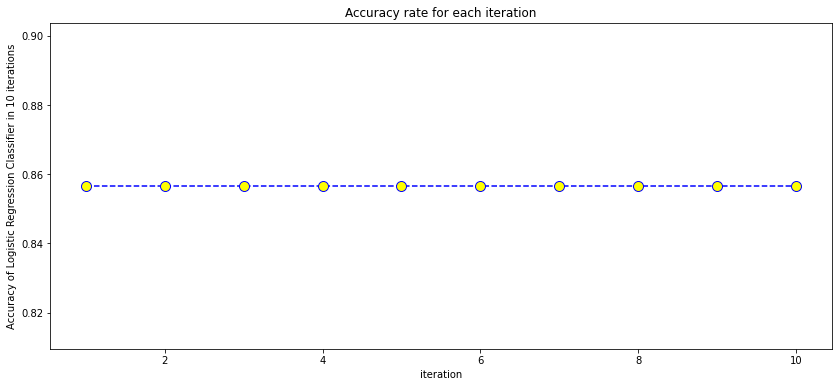

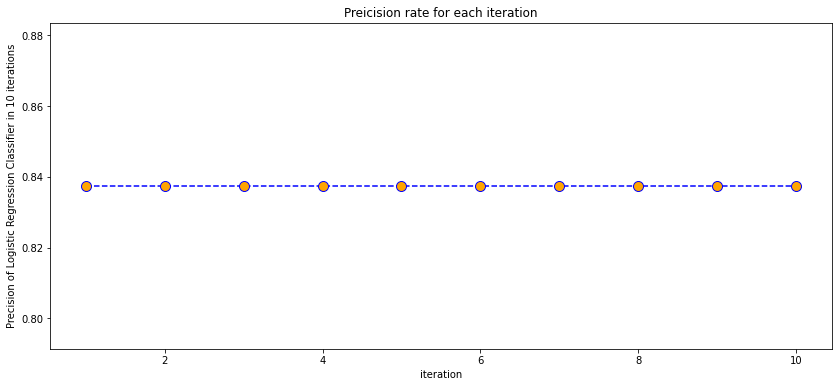

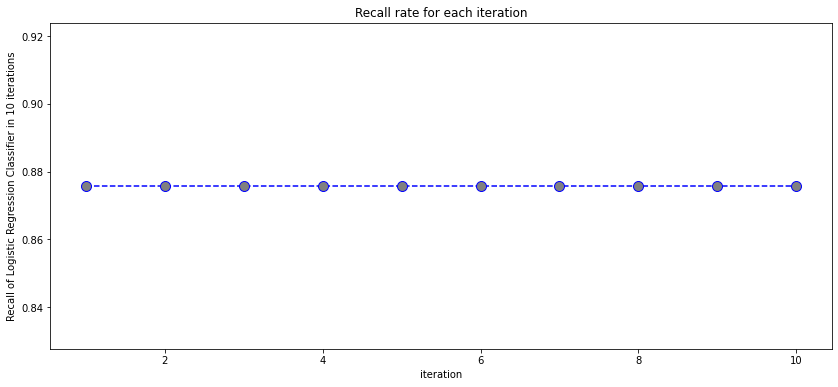

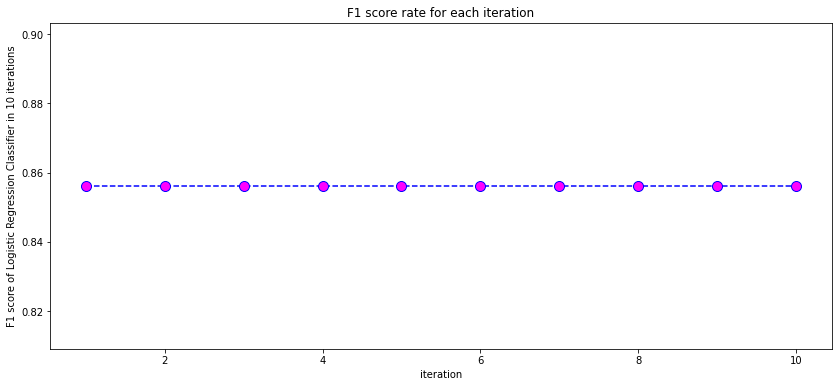

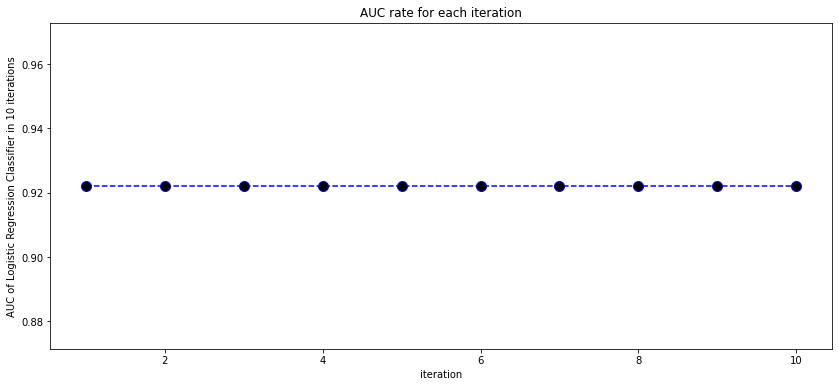

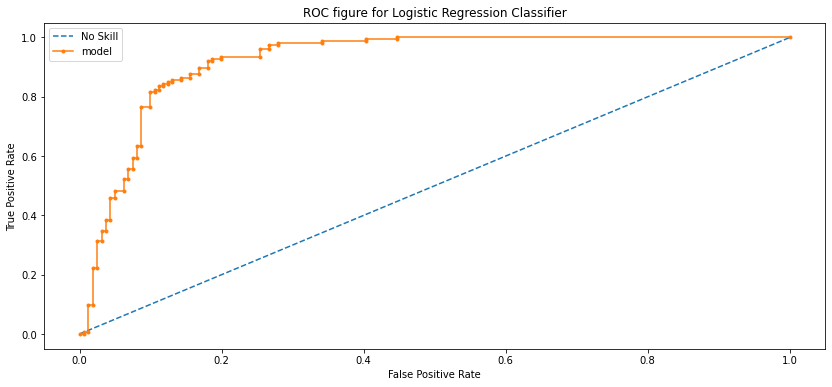

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
Accuracy=[]
F1=[]
F1_0=[]
F1_1=[]
Precision=[]
AUC=[]
Precision_0=[]
Precision_1=[]
Recall=[]
Recall_0=[]
Recall_1=[]
for i in range(1,11):
  model=model.fit(X_train, y_train)
  model_pred = model.predict(X_test)
  probs = model.predict_proba(X_test)
  probs = probs[:, 1]
  auc=roc_auc_score(y_test, probs)
  AUC.append(auc)
  acc = accuracy_score(y_test, model_pred)
  precision= precision_score(y_test, model_pred)
  f1=f1_score(y_test, model_pred)
  recall=recall_score(y_test, model_pred)
  Accuracy.append(acc)
  Precision.append(precision)
  Recall.append(recall)
  F1.append(f1)
  reports=classification_report(y_test,model_pred,output_dict=True)
  Precision_0.append(reports['0']['precision'])
  Precision_1.append(reports['1']['precision'])
  F1_0.append(reports['0']['f1-score'])
  F1_1.append(reports['1']['f1-score'])
  Recall_0.append(reports['0']['recall'])
  Recall_1.append(reports['1']['recall'])
plt.figure(figsize=(14,6))
plt.plot(range(1,11),Accuracy,color='blue', linestyle='dashed', marker='o',markerfacecolor='yellow', markersize=10)
plt.title('Accuracy rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('Accuracy of Logistic Regression Classifier in 10 iterations')
print('Mean Accuracy for the 10 iterations is:',np.mean(Accuracy))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),Precision,color='blue', linestyle='dashed', marker='o',markerfacecolor='orange', markersize=10)
plt.title('Preicision rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('Precision of Logistic Regression Classifier in 10 iterations')
print('Mean Precision for the 10 iterations is:',np.mean(Precision))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),Recall,color='blue', linestyle='dashed', marker='o',markerfacecolor='grey', markersize=10)
plt.title('Recall rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('Recall of Logistic Regression Classifier in 10 iterations')
print('Mean Recall for the 10 iterations is:',np.mean(Recall))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),F1,color='blue', linestyle='dashed', marker='o',markerfacecolor='magenta', markersize=10)
plt.title('F1 score rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('F1 score of Logistic Regression Classifier in 10 iterations')
print('Mean F1 score for the 10 iterations is:',np.mean(F1))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),AUC,color='blue', linestyle='dashed', marker='o',markerfacecolor='black', markersize=10)
plt.title('AUC rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('AUC of Logistic Regression Classifier in 10 iterations')

print('Mean AUC for the 10 iterations is:',np.mean(AUC))
print('Mean Precision score for 0 category is:',np.mean(Precision_0))
print('Mean Precision score for 1 category is:',np.mean(Precision_1))
print('Mean Recall score for 0 category is:',np.mean(Recall_0))
print('Mean Recall score for 1 category is:',np.mean(Recall_1))
print('Mean F1 score score for 0 category is:',np.mean(F1_0))
print('Mean F1 score score for 1 category is:',np.mean(F1_1))
print(" Accuracy is :", acc)
print(confusion_matrix(y_test,model_pred))
print(classification_report(y_test,model_pred))
Final_scores= [round(np.mean(Accuracy),3),round(np.mean(Precision),3),round(np.mean(Recall),3),round(np.mean(F1),3),round(np.mean(AUC),3)]
# ROC figure
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
model_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
model_probs = model_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
model_auc = roc_auc_score(y_test, model_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression Classifier: ROC AUC=%.3f' % (model_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
model_fpr, model_tpr, _ = roc_curve(y_test, model_probs)
# plot the roc curve for the model
plt.figure(figsize=(14,6))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(model_fpr, model_tpr, marker='.', label='model')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC figure for Logistic Regression Classifier')
# show the legend
plt.legend()
# show the plot
plt.show()


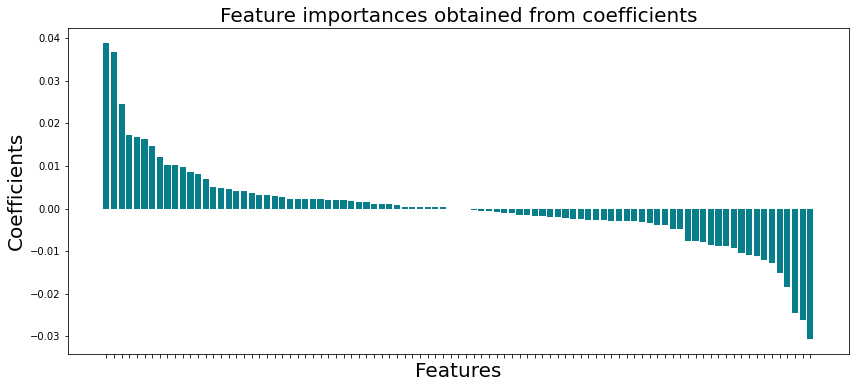

In [ ]:
plt.figure(figsize=(14,6))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.tick_params(labelbottom=False)
plt.xlabel('Features',fontsize=20)
plt.ylabel('Coefficients',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

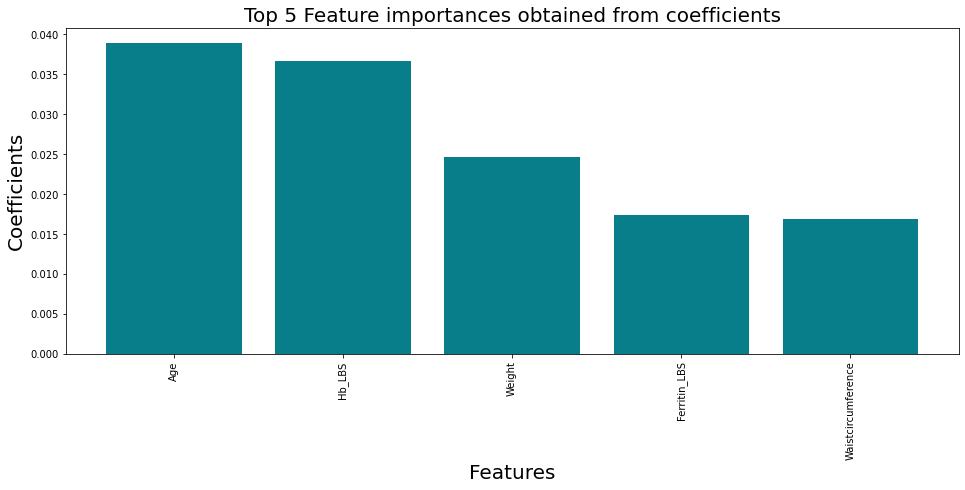

In [ ]:
plt.figure(figsize=(16,6))
importances.replace('x28_Never','diet_history',inplace= True)
importances.replace('x8_Yes','como_HTN',inplace= True)
importances.replace('x13_Yes','como_Heartburn',inplace= True)
importances.replace('x7_No','Como_Hypothyroidism',inplace= True)
plt.bar(x=importances['Attribute'].head(5), height=importances['Importance'].head(5), color='#087E8B')
plt.title('Top 5 Feature importances obtained from coefficients', size=20)
plt.xlabel('Features',fontsize=20)
plt.ylabel('Coefficients',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
new_df= unscaled_df.drop(importances['Attribute'].tail(50),axis =1 )
X, y = undersample.fit_resample(new_df.drop('target',axis=1), new_df['target'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2) # 80% training and 20% test
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 630, 1: 624})


Mean Accuracy for the 10 iterations is: 0.8853503184713375
Mean Precision for the 10 iterations is: 0.8734939759036144
Mean Recall for the 10 iterations is: 0.90625
Mean F1 score for the 10 iterations is: 0.8895705521472392
Mean AUC for the 10 iterations is: 0.9408279220779221
Mean Precision score for 0 category is: 0.8986486486486488
Mean Precision score for 1 category is: 0.8734939759036144
Mean Recall score for 0 category is: 0.8636363636363636
Mean Recall score for 1 category is: 0.90625
Mean F1 score score for 0 category is: 0.880794701986755
Mean F1 score score for 1 category is: 0.8895705521472392
 Accuracy is : 0.8853503184713376
[[133  21]
 [ 15 145]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       154
           1       0.87      0.91      0.89       160

    accuracy                           0.89       314
   macro avg       0.89      0.88      0.89       314
weighted avg       0.89      0.89      0.89       314

No S

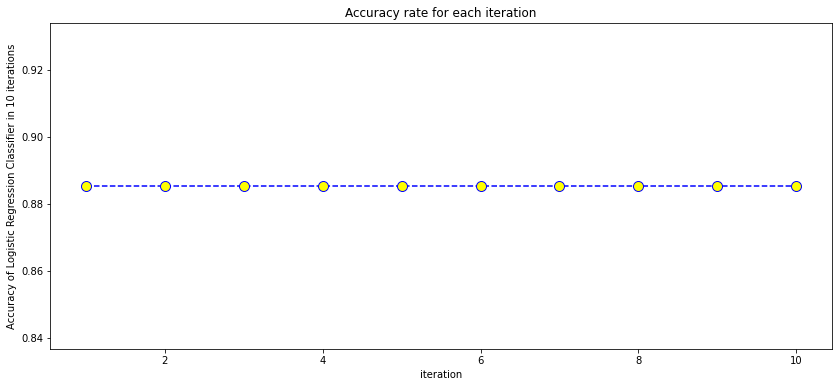

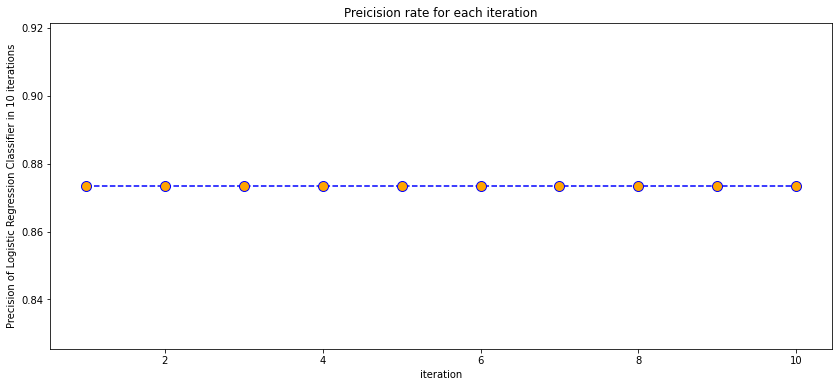

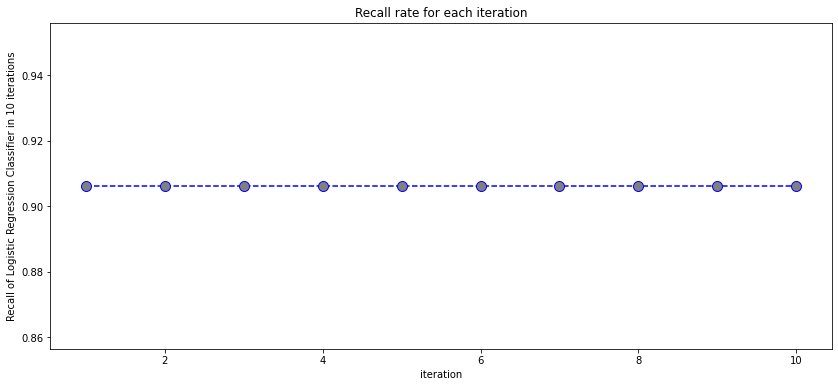

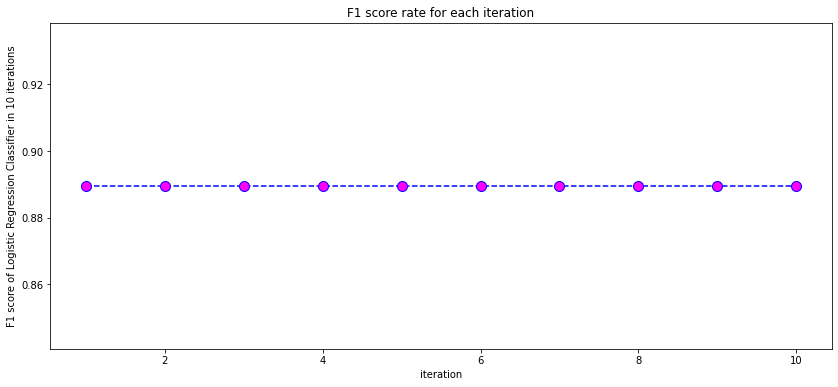

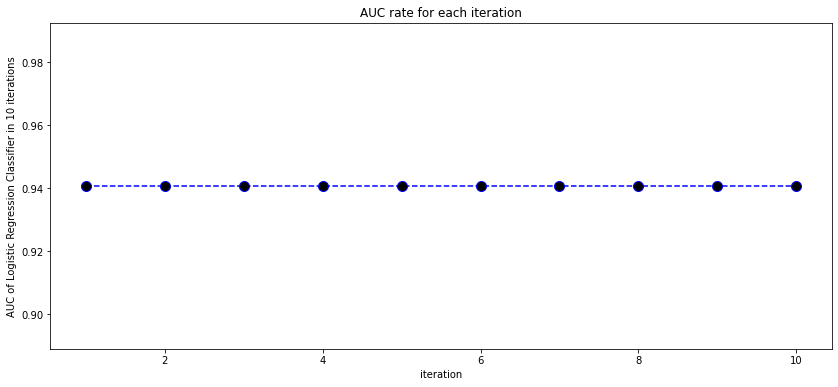

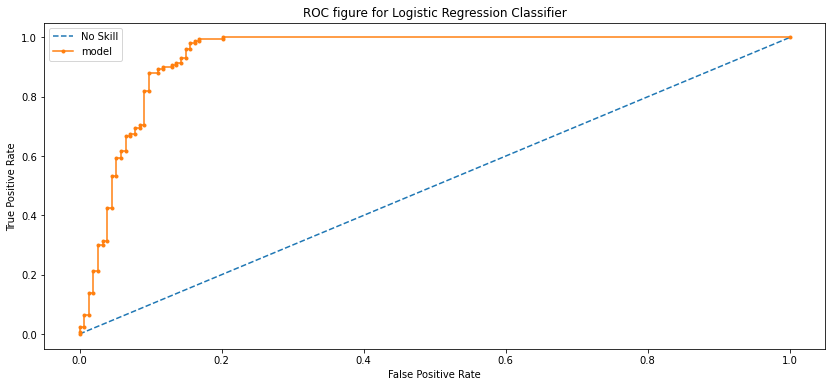

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
Accuracy=[]
F1=[]
F1_0=[]
F1_1=[]
Precision=[]
AUC=[]
Precision_0=[]
Precision_1=[]
Recall=[]
Recall_0=[]
Recall_1=[]
for i in range(1,11):
  model=model.fit(X_train, y_train)
  model_pred = model.predict(X_test)
  probs = model.predict_proba(X_test)
  probs = probs[:, 1]
  auc=roc_auc_score(y_test, probs)
  AUC.append(auc)
  acc = accuracy_score(y_test, model_pred)
  precision= precision_score(y_test, model_pred)
  f1=f1_score(y_test, model_pred)
  recall=recall_score(y_test, model_pred)
  Accuracy.append(acc)
  Precision.append(precision)
  Recall.append(recall)
  F1.append(f1)
  reports=classification_report(y_test,model_pred,output_dict=True)
  Precision_0.append(reports['0']['precision'])
  Precision_1.append(reports['1']['precision'])
  F1_0.append(reports['0']['f1-score'])
  F1_1.append(reports['1']['f1-score'])
  Recall_0.append(reports['0']['recall'])
  Recall_1.append(reports['1']['recall'])
plt.figure(figsize=(14,6))
plt.plot(range(1,11),Accuracy,color='blue', linestyle='dashed', marker='o',markerfacecolor='yellow', markersize=10)
plt.title('Accuracy rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('Accuracy of Logistic Regression Classifier in 10 iterations')
print('Mean Accuracy for the 10 iterations is:',np.mean(Accuracy))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),Precision,color='blue', linestyle='dashed', marker='o',markerfacecolor='orange', markersize=10)
plt.title('Preicision rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('Precision of Logistic Regression Classifier in 10 iterations')
print('Mean Precision for the 10 iterations is:',np.mean(Precision))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),Recall,color='blue', linestyle='dashed', marker='o',markerfacecolor='grey', markersize=10)
plt.title('Recall rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('Recall of Logistic Regression Classifier in 10 iterations')
print('Mean Recall for the 10 iterations is:',np.mean(Recall))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),F1,color='blue', linestyle='dashed', marker='o',markerfacecolor='magenta', markersize=10)
plt.title('F1 score rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('F1 score of Logistic Regression Classifier in 10 iterations')
print('Mean F1 score for the 10 iterations is:',np.mean(F1))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),AUC,color='blue', linestyle='dashed', marker='o',markerfacecolor='black', markersize=10)
plt.title('AUC rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('AUC of Logistic Regression Classifier in 10 iterations')
print('Mean AUC for the 10 iterations is:',np.mean(AUC))
print('Mean Precision score for 0 category is:',np.mean(Precision_0))
print('Mean Precision score for 1 category is:',np.mean(Precision_1))
print('Mean Recall score for 0 category is:',np.mean(Recall_0))
print('Mean Recall score for 1 category is:',np.mean(Recall_1))
print('Mean F1 score score for 0 category is:',np.mean(F1_0))
print('Mean F1 score score for 1 category is:',np.mean(F1_1))
print(" Accuracy is :", acc)
print(confusion_matrix(y_test,model_pred))
print(classification_report(y_test,model_pred))
Final_scores_after= [round(np.mean(Accuracy),3),round(np.mean(Precision),3),round(np.mean(Recall),3),round(np.mean(F1),3),round(np.mean(AUC),3)]
lr_best_score=Final_scores_after
# ROC figure
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
model_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
model_probs = model_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
model_auc = roc_auc_score(y_test, model_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression Classifier: ROC AUC=%.3f' % (model_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
model_fpr, model_tpr, _ = roc_curve(y_test, model_probs)
# plot the roc curve for the model
plt.figure(figsize=(14,6))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(model_fpr, model_tpr, marker='.', label='model')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC figure for Logistic Regression Classifier')
# show the legend
plt.legend()
# show the plot
plt.show()


before feature selection classifications scores are: [0.857, 0.838, 0.876, 0.856, 0.922]
after feature selection classifications scores are: [0.885, 0.873, 0.906, 0.89, 0.941]


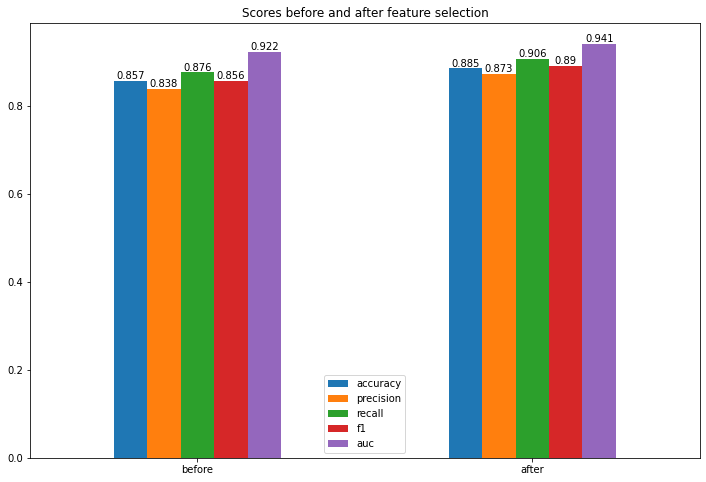

In [ ]:
accs=[Final_scores[0],Final_scores_after[0]]
precisions=[Final_scores[1],Final_scores_after[1]]
recalls=[Final_scores[2],Final_scores_after[2]]
f1s=[Final_scores[3],Final_scores_after[3]]
aucs=[Final_scores[4],Final_scores_after[4]]
index=['before','after']
df = pd.DataFrame({'accuracy': accs,
                   'precision': precisions,'recall': recalls,'f1': f1s,'auc': aucs}, index=index)
ax = df.plot.bar(rot=0,figsize=(12,8),title='Scores before and after feature selection')
for container in ax.containers:
    ax.bar_label(container)
print('before feature selection classifications scores are:' ,Final_scores)
print('after feature selection classifications scores are:' ,Final_scores_after)

In [ ]:
undersample = NearMiss(version=2)
# transform the dataset
X, y = undersample.fit_resample(unscaled_df.drop(['target'],axis=1), unscaled_df['target'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20) # 70% training and 30% test
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({1: 635, 0: 619})


Decision Tree Classifier

0.8860063492063492
{'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 6}
Mean Accuracy for the 10 iterations is: 0.8694267515923567
Mean Precision for the 10 iterations is: 0.8068181818181819
Mean Recall for the 10 iterations is: 0.9530201342281879
Mean F1 score for the 10 iterations is: 0.8738461538461537
Mean AUC for the 10 iterations is: 0.8827130364043116
Mean Precision score for 0 category is: 0.9492753623188405
Mean Precision score for 1 category is: 0.8068181818181819
Mean Recall score for 0 category is: 0.793939393939394
Mean Recall score for 1 category is: 0.9530201342281879
Mean F1 score score for 0 category is: 0.8646864686468646
Mean F1 score score for 1 category is: 0.8738461538461537
 Accuracy is : 0.8694267515923567
[[131  34]
 [  7 142]]
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       165
           1       0.81      0.95      0.87       149

    accuracy                           0.87       314
   macro

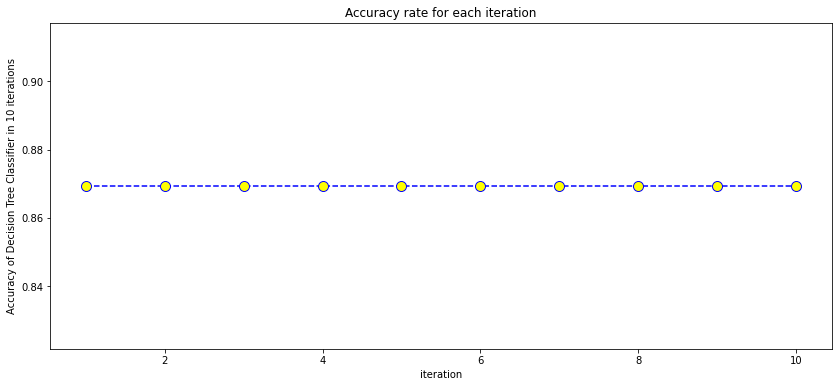

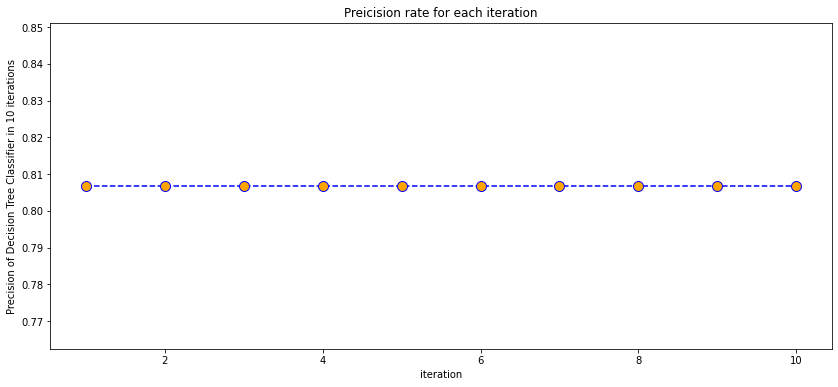

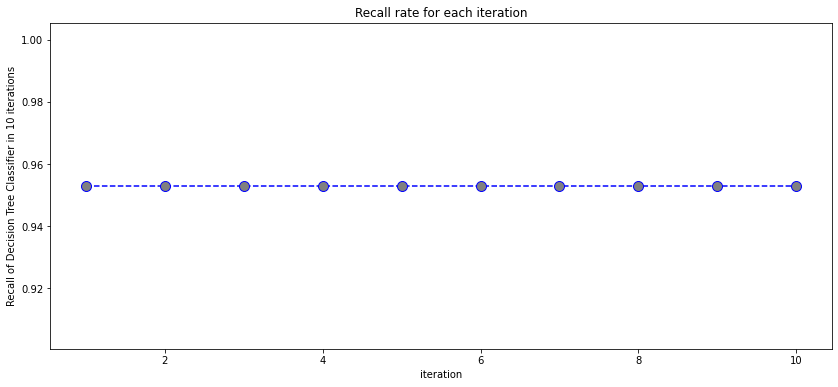

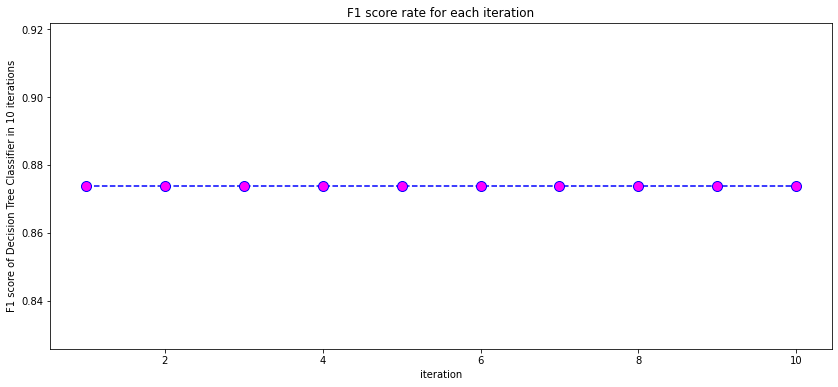

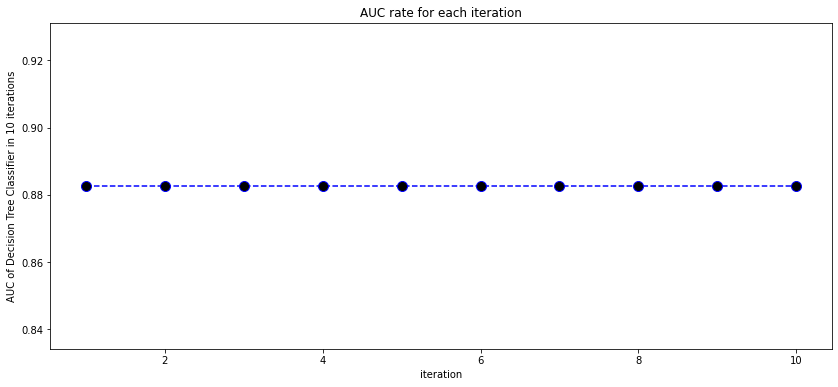

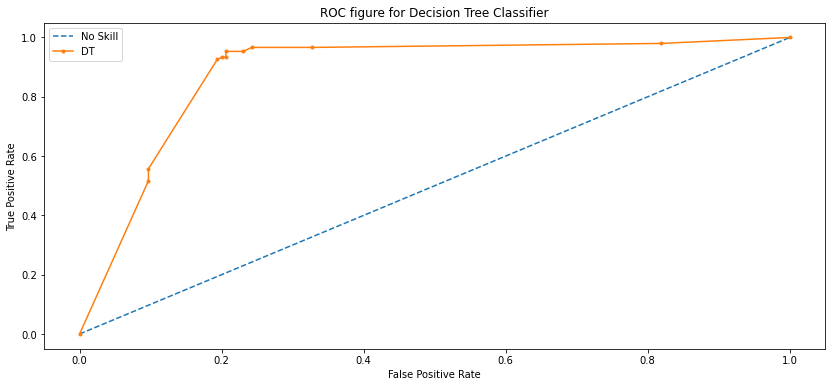

with best params given to the model:
 Accuracy is : 0.8694267515923567
-------------------------------------------
confusion Matrix :
[[131  34]
 [  7 142]]
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       165
           1       0.81      0.95      0.87       149

    accuracy                           0.87       314
   macro avg       0.88      0.87      0.87       314
weighted avg       0.88      0.87      0.87       314



array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.67092469e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.17603957e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.37846371e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [ ]:

# Finding the best hyparameters for DecisionTreeClassifier using GridSearch
model= DecisionTreeClassifier()
params = { 'min_samples_leaf': [1, 2, 3,4,5,6], 'max_depth': [1, 2, 3,4,5,6],'min_samples_split':[2,3,4,5,6] }
grid = GridSearchCV(estimator=model, param_grid=params, cv=10, n_jobs=1, verbose=0) # # Fit the model
grid.fit(X_train, y_train)
#Assess the score
print(grid.best_score_)
print(grid.best_params_)
#run the model with best params
DT= DecisionTreeClassifier( max_depth=grid.best_params_['max_depth'] ,
                              min_samples_leaf=grid.best_params_['min_samples_leaf'],min_samples_split=grid.best_params_['min_samples_split'])
Accuracy=[]
F1=[]
F1_0=[]
F1_1=[]
Precision=[]
AUC=[]
Precision_0=[]
Precision_1=[]
Recall=[]
Recall_0=[]
Recall_1=[]
for i in range(1,11):
  DT.fit(X_train, y_train)
  DT_pred = DT.predict(X_test)
  probs = DT.predict_proba(X_test)
  probs = probs[:, 1]
  auc=roc_auc_score(y_test, probs)
  AUC.append(auc)
  acc = accuracy_score(y_test, DT_pred)
  precision= precision_score(y_test, DT_pred)
  f1=f1_score(y_test, DT_pred)
  recall=recall_score(y_test, DT_pred)
  Accuracy.append(acc)
  Precision.append(precision)
  Recall.append(recall)
  F1.append(f1)
  reports=classification_report(y_test,DT_pred,output_dict=True)
  Precision_0.append(reports['0']['precision'])
  Precision_1.append(reports['1']['precision'])
  F1_0.append(reports['0']['f1-score'])
  F1_1.append(reports['1']['f1-score'])
  Recall_0.append(reports['0']['recall'])
  Recall_1.append(reports['1']['recall'])
Final_scores= [round(np.mean(Accuracy),3),round(np.mean(Precision),3),round(np.mean(Recall),3),round(np.mean(F1),3),round(np.mean(AUC),3)]
plt.figure(figsize=(14,6))
plt.plot(range(1,11),Accuracy,color='blue', linestyle='dashed', marker='o',markerfacecolor='yellow', markersize=10)
plt.title('Accuracy rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('Accuracy of Decision Tree Classifier in 10 iterations')
print('Mean Accuracy for the 10 iterations is:',np.mean(Accuracy))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),Precision,color='blue', linestyle='dashed', marker='o',markerfacecolor='orange', markersize=10)
plt.title('Preicision rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('Precision of Decision Tree Classifier in 10 iterations')
print('Mean Precision for the 10 iterations is:',np.mean(Precision))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),Recall,color='blue', linestyle='dashed', marker='o',markerfacecolor='grey', markersize=10)
plt.title('Recall rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('Recall of Decision Tree Classifier in 10 iterations')
print('Mean Recall for the 10 iterations is:',np.mean(Recall))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),F1,color='blue', linestyle='dashed', marker='o',markerfacecolor='magenta', markersize=10)
plt.title('F1 score rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('F1 score of Decision Tree Classifier in 10 iterations')
print('Mean F1 score for the 10 iterations is:',np.mean(F1))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),AUC,color='blue', linestyle='dashed', marker='o',markerfacecolor='black', markersize=10)
plt.title('AUC rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('AUC of Decision Tree Classifier in 10 iterations')

print('Mean AUC for the 10 iterations is:',np.mean(AUC))
print('Mean Precision score for 0 category is:',np.mean(Precision_0))
print('Mean Precision score for 1 category is:',np.mean(Precision_1))
print('Mean Recall score for 0 category is:',np.mean(Recall_0))
print('Mean Recall score for 1 category is:',np.mean(Recall_1))
print('Mean F1 score score for 0 category is:',np.mean(F1_0))
print('Mean F1 score score for 1 category is:',np.mean(F1_1))
print(" Accuracy is :", acc)
print(confusion_matrix(y_test,DT_pred))
print(classification_report(y_test,DT_pred))

# ROC figure
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
DT_probs = DT.predict_proba(X_test)
# keep probabilities for the positive outcome only
DT_probs = DT_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
DT_auc = roc_auc_score(y_test, DT_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree Classifier: ROC AUC=%.3f' % (DT_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
DT_fpr, DT_tpr, _ = roc_curve(y_test, DT_probs)
# plot the roc curve for the model
plt.figure(figsize=(14,6))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(DT_fpr, DT_tpr, marker='.', label='DT')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC figure for Decision Tree Classifier')
# show the legend
plt.legend()
# show the plot
plt.show()
# Train Decision Tree Classifer

y_predict = DT.predict(X_test)
acc = accuracy_score(y_test, y_predict)
print('with best params given to the model:')
print(" Accuracy is :", acc)
print('-------------------------------------------')
print('confusion Matrix :')
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
DT.feature_importances_

with DecisionTree Builtin feature importance calculator


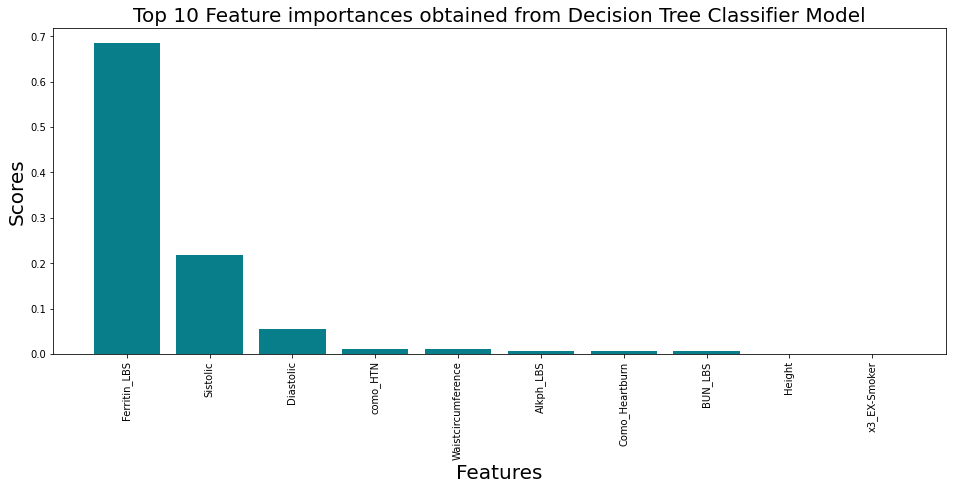

top five importancest features are sorted below: 
                     Specs     Score
84            Ferritin_LBS  0.684602
74                Sistolic  0.218740
75               Diastolic  0.054658
28                como_HTN  0.011760
78      Waistcircumference  0.010066
91               Alkph_LBS  0.007070
37          Como_Heartburn  0.006378
87                 BUN_LBS  0.005543
76                  Height  0.000715
14            x3_EX-Smoker  0.000467
0                     x0_F  0.000000
1                     x0_M  0.000000
2              x1_Divorced  0.000000
3               x1_Married  0.000000
4                x1_Single  0.000000
5                 x1_Widow  0.000000
6             x2_Doctorate  0.000000
7              x2_Graduate  0.000000
8   x2_High School Diploma  0.000000
9       x2_Master's Degree  0.000000
------------------------------------------------------------


In [ ]:
print('with DecisionTree Builtin feature importance calculator')
dfscores = pd.DataFrame(DT.feature_importances_)
dfcolumns = pd.DataFrame(scaled_df.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.sort_values(by='Score', ascending=False)
plt.figure(figsize=(16,6))
#importances.replace('x28_Never','diet_history',inplace= True)
featureScores.replace('x8_Yes','como_HTN',inplace= True)
featureScores.replace('x13_No','Como_Heartburn',inplace= True)
plt.bar(x=featureScores.nlargest(10,'Score')['Specs'], height=featureScores.nlargest(10,'Score')['Score'], color='#087E8B')
plt.title('Top 10 Feature importances obtained from Decision Tree Classifier Model', size=20)
plt.xlabel('Features',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()
print('top five importancest features are sorted below: ')
print(featureScores.nlargest(20,'Score'))  #print 5 best features
print("------------------------------------------------------------")

0.9130984126984127
{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}
Mean Accuracy for the 10 iterations is: 0.9044585987261146
Mean Precision for the 10 iterations is: 0.8452380952380952
Mean Recall for the 10 iterations is: 0.9726027397260275
Mean F1 score for the 10 iterations is: 0.9044585987261146
Mean AUC for the 10 iterations is: 0.9141593281148076
Mean Precision score for 0 category is: 0.9726027397260275
Mean Precision score for 1 category is: 0.8452380952380952
Mean Recall score for 0 category is: 0.8452380952380952
Mean Recall score for 1 category is: 0.9726027397260275
Mean F1 score score for 0 category is: 0.9044585987261146
Mean F1 score score for 1 category is: 0.9044585987261146
 Accuracy is : 0.9044585987261147
[[142  26]
 [  4 142]]
              precision    recall  f1-score   support

           0       0.97      0.85      0.90       168
           1       0.85      0.97      0.90       146

    accuracy                           0.90       314
   macr

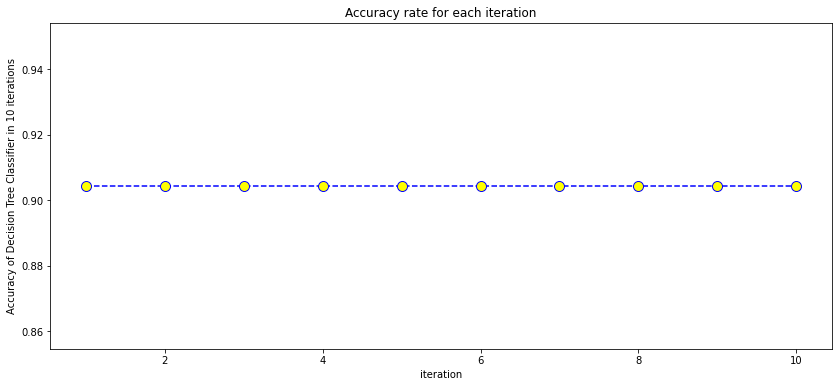

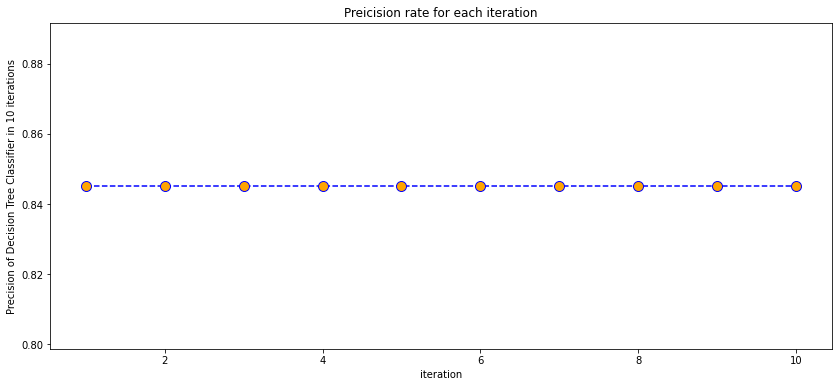

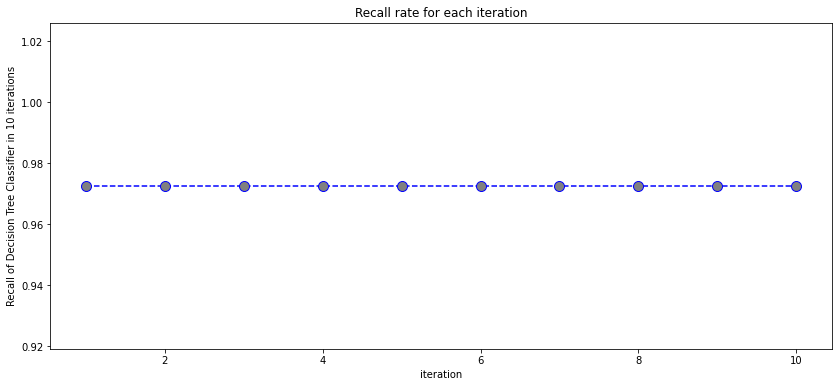

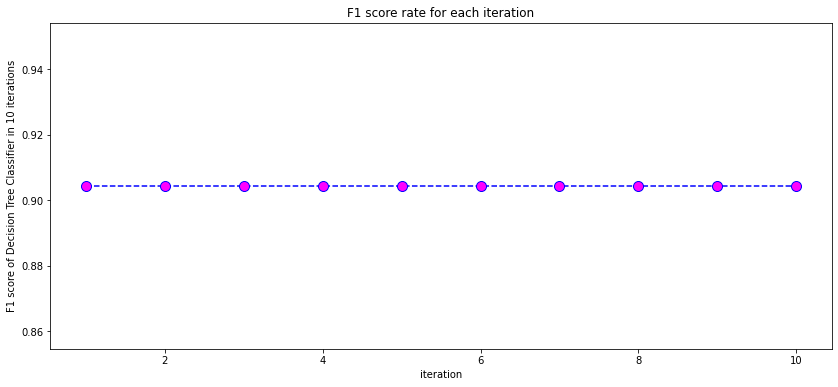

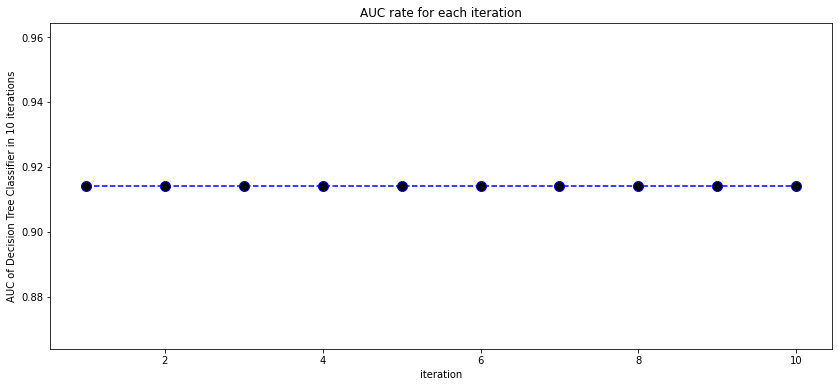

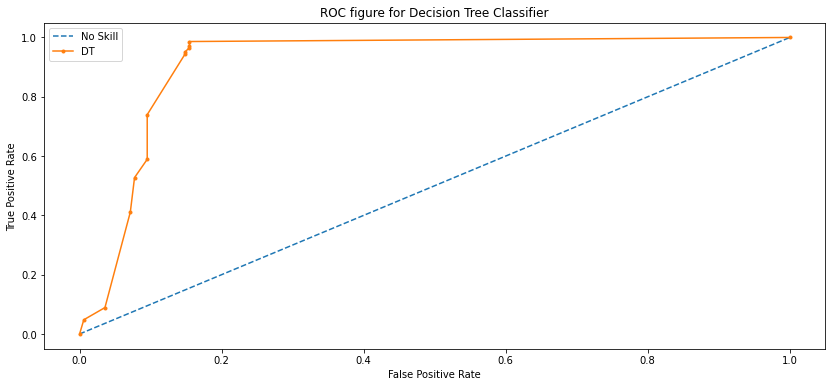

with best params given to the model:
 Accuracy is : 0.9044585987261147
-------------------------------------------
confusion Matrix :
[[142  26]
 [  4 142]]
              precision    recall  f1-score   support

           0       0.97      0.85      0.90       168
           1       0.85      0.97      0.90       146

    accuracy                           0.90       314
   macro avg       0.91      0.91      0.90       314
weighted avg       0.91      0.90      0.90       314



array([0.75769295, 0.24230705])

In [ ]:
L= featureScores.nlargest(2,'Score')['Specs'].to_numpy()
new_df= unscaled_df[L]
new_df['target']= unscaled_df['target']
undersample = NearMiss(version=2)
# transform the dataset
X, y = undersample.fit_resample(new_df.drop(['target'],axis=1), new_df['target'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20) # 70% training and 30% test
# Finding the best hyparameters for DecisionTreeClassifier using GridSearch
model= DecisionTreeClassifier()
params = { 'min_samples_leaf': [1, 2, 3,4,5,6], 'max_depth': [1, 2, 3,4,5,6],'min_samples_split':[2,3,4,5,6] }
grid = GridSearchCV(estimator=model, param_grid=params, cv=10, n_jobs=1, verbose=0) # # Fit the model
grid.fit(X_train, y_train)
#Assess the score
print(grid.best_score_)
print(grid.best_params_)
#run the model with best params
DT= DecisionTreeClassifier( max_depth=grid.best_params_['max_depth'] ,
                              min_samples_leaf=grid.best_params_['min_samples_leaf'],min_samples_split=grid.best_params_['min_samples_split'])
Accuracy=[]
F1=[]
F1_0=[]
F1_1=[]
Precision=[]
AUC=[]
Precision_0=[]
Precision_1=[]
Recall=[]
Recall_0=[]
Recall_1=[]
for i in range(1,11):
  DT.fit(X_train, y_train)
  DT_pred = DT.predict(X_test)
  probs = DT.predict_proba(X_test)
  probs = probs[:, 1]
  auc=roc_auc_score(y_test, probs)
  AUC.append(auc)
  acc = accuracy_score(y_test, DT_pred)
  precision= precision_score(y_test, DT_pred)
  f1=f1_score(y_test, DT_pred)
  recall=recall_score(y_test, DT_pred)
  Accuracy.append(acc)
  Precision.append(precision)
  Recall.append(recall)
  F1.append(f1)
  reports=classification_report(y_test,DT_pred,output_dict=True)
  Precision_0.append(reports['0']['precision'])
  Precision_1.append(reports['1']['precision'])
  F1_0.append(reports['0']['f1-score'])
  F1_1.append(reports['1']['f1-score'])
  Recall_0.append(reports['0']['recall'])
  Recall_1.append(reports['1']['recall'])
Final_scores_after= [round(np.mean(Accuracy),3),round(np.mean(Precision),3),round(np.mean(Recall),3),round(np.mean(F1),3),round(np.mean(AUC),3)]
dt_best_score=Final_scores_after
plt.figure(figsize=(14,6))
plt.plot(range(1,11),Accuracy,color='blue', linestyle='dashed', marker='o',markerfacecolor='yellow', markersize=10)
plt.title('Accuracy rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('Accuracy of Decision Tree Classifier in 10 iterations')
print('Mean Accuracy for the 10 iterations is:',np.mean(Accuracy))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),Precision,color='blue', linestyle='dashed', marker='o',markerfacecolor='orange', markersize=10)
plt.title('Preicision rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('Precision of Decision Tree Classifier in 10 iterations')
print('Mean Precision for the 10 iterations is:',np.mean(Precision))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),Recall,color='blue', linestyle='dashed', marker='o',markerfacecolor='grey', markersize=10)
plt.title('Recall rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('Recall of Decision Tree Classifier in 10 iterations')
print('Mean Recall for the 10 iterations is:',np.mean(Recall))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),F1,color='blue', linestyle='dashed', marker='o',markerfacecolor='magenta', markersize=10)
plt.title('F1 score rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('F1 score of Decision Tree Classifier in 10 iterations')
print('Mean F1 score for the 10 iterations is:',np.mean(F1))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),AUC,color='blue', linestyle='dashed', marker='o',markerfacecolor='black', markersize=10)
plt.title('AUC rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('AUC of Decision Tree Classifier in 10 iterations')

print('Mean AUC for the 10 iterations is:',np.mean(AUC))
print('Mean Precision score for 0 category is:',np.mean(Precision_0))
print('Mean Precision score for 1 category is:',np.mean(Precision_1))
print('Mean Recall score for 0 category is:',np.mean(Recall_0))
print('Mean Recall score for 1 category is:',np.mean(Recall_1))
print('Mean F1 score score for 0 category is:',np.mean(F1_0))
print('Mean F1 score score for 1 category is:',np.mean(F1_1))
print(" Accuracy is :", acc)
print(confusion_matrix(y_test,DT_pred))
print(classification_report(y_test,DT_pred))

# ROC figure
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
DT_probs = DT.predict_proba(X_test)
# keep probabilities for the positive outcome only
DT_probs = DT_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
DT_auc = roc_auc_score(y_test, DT_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree Classifier: ROC AUC=%.3f' % (DT_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
DT_fpr, DT_tpr, _ = roc_curve(y_test, DT_probs)
# plot the roc curve for the model
plt.figure(figsize=(14,6))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(DT_fpr, DT_tpr, marker='.', label='DT')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC figure for Decision Tree Classifier')
# show the legend
plt.legend()
# show the plot
plt.show()
# Train Decision Tree Classifer

y_predict = DT.predict(X_test)
acc = accuracy_score(y_test, y_predict)
print('with best params given to the model:')
print(" Accuracy is :", acc)
print('-------------------------------------------')
print('confusion Matrix :')
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
DT.feature_importances_

before feature selection classifications scores are: [0.869, 0.807, 0.953, 0.874, 0.883]
after feature selection classifications scores are: [0.904, 0.845, 0.973, 0.904, 0.914]


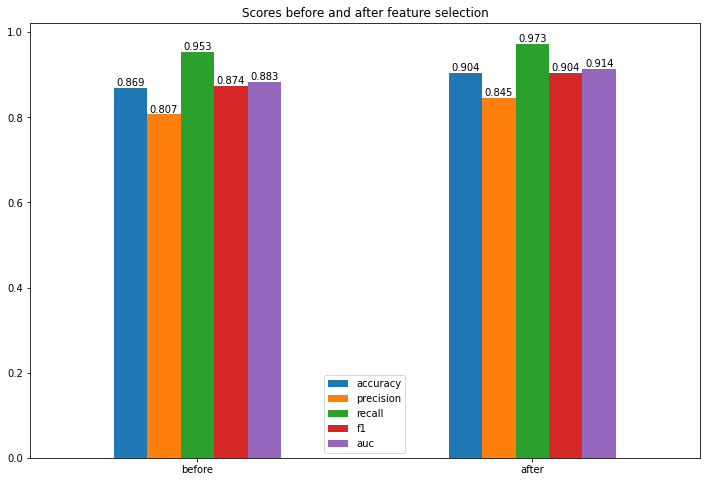

In [ ]:
accs=[Final_scores[0],Final_scores_after[0]]
precisions=[Final_scores[1],Final_scores_after[1]]
recalls=[Final_scores[2],Final_scores_after[2]]
f1s=[Final_scores[3],Final_scores_after[3]]
aucs=[Final_scores[4],Final_scores_after[4]]
index=['before','after']
df = pd.DataFrame({'accuracy': accs,
                   'precision': precisions,'recall': recalls,'f1': f1s,'auc': aucs}, index=index)
ax = df.plot.bar(rot=0,figsize=(12,8),title='Scores before and after feature selection')
for container in ax.containers:
    ax.bar_label(container)
print('before feature selection classifications scores are:' ,Final_scores)
print('after feature selection classifications scores are:' ,Final_scores_after)

Random forest classifier

In [ ]:
undersample = NearMiss(version=2)
# transform the dataset
X, y = undersample.fit_resample(scaled_df.drop(['target'],axis=1), scaled_df['target'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20) # 80% training and 20% test
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({1: 635, 0: 619})


WITH n_estimators=1 (some random parameter value)
 Accuracy is : 0.6719745222929936
[[108  57]
 [ 46 103]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.68       165
           1       0.64      0.69      0.67       149

    accuracy                           0.67       314
   macro avg       0.67      0.67      0.67       314
weighted avg       0.67      0.67      0.67       314

WITH best n_estimators= 46
Mean Accuracy for the 10 iterations is: 0.8420382165605096
Mean Precision for the 10 iterations is: 0.7998577625298068
Mean Recall for the 10 iterations is: 0.8899328859060404
Mean F1 score for the 10 iterations is: 0.8424065513670491
Mean AUC for the 10 iterations is: 0.9061175513524506
Mean Precision score for 0 category is: 0.8895797834061853
Mean Precision score for 1 category is: 0.7998577625298068
Mean Recall score for 0 category is: 0.7987878787878788
Mean Recall score for 1 category is: 0.8899328859060404
Mean F1 score score 

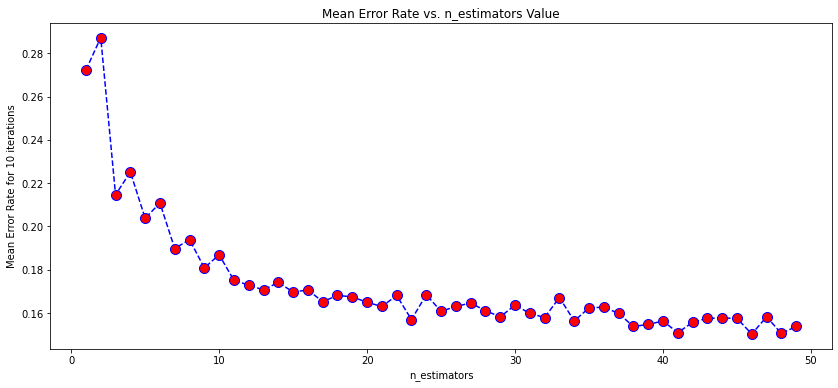

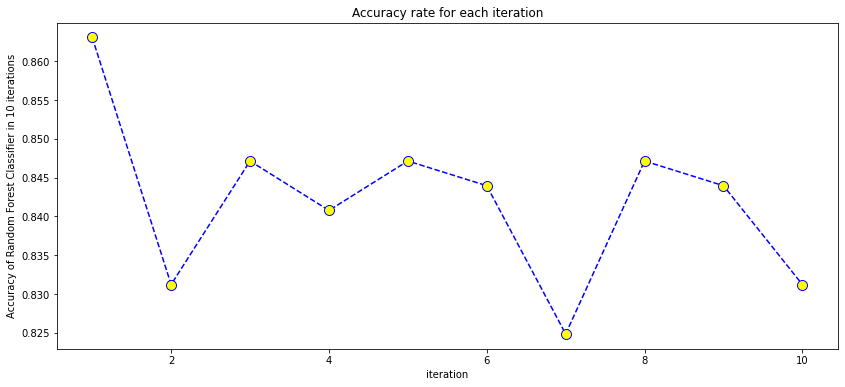

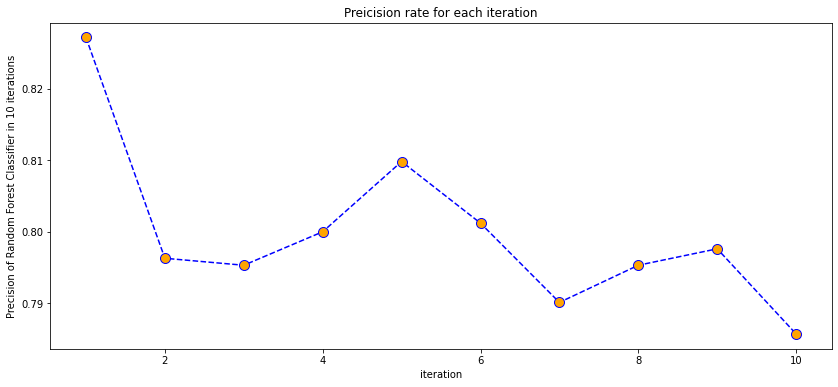

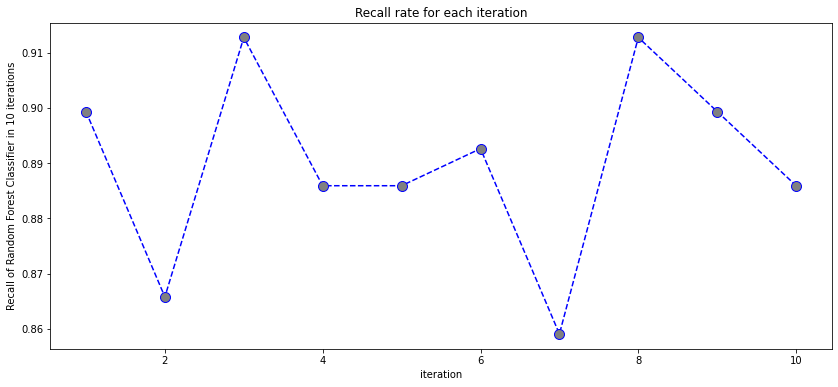

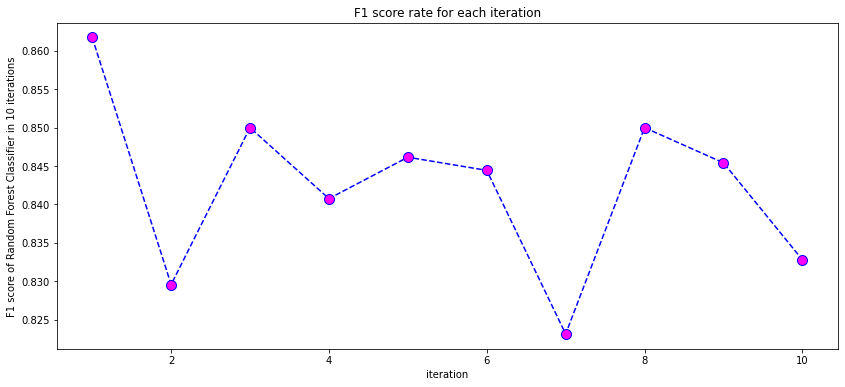

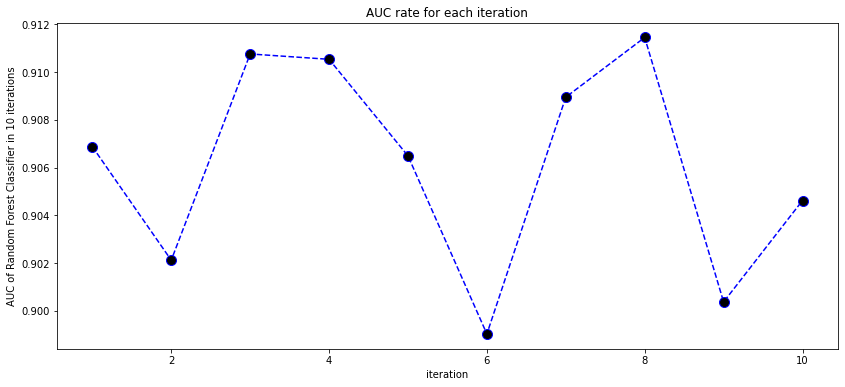

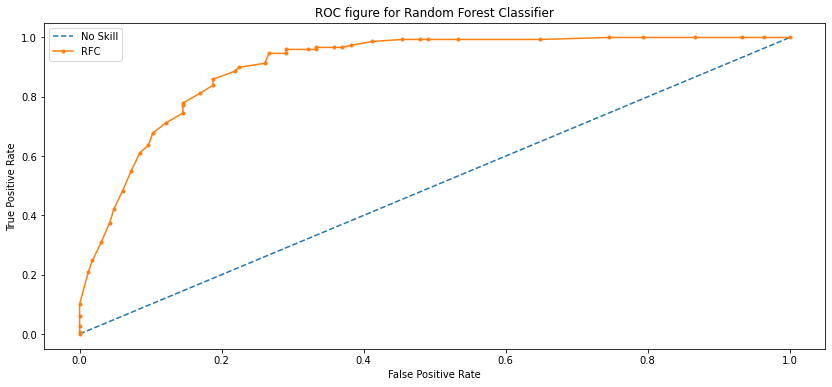

In [ ]:
rfc = RandomForestClassifier(n_estimators=1)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

print('WITH n_estimators=1 (some random parameter value)')
acc = accuracy_score(y_test, rfc_pred)
print(" Accuracy is :", acc)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))
# Find best Parametr for RF
error_rate=[]
for i in range(1,50):
        iteration_error=[]
        #calculate mean of error rate for each senario
        for j in range(10):
            rfc = RandomForestClassifier(n_estimators=i)
            rfc.fit(X_train,y_train)
            pred_i = rfc.predict(X_test)
            iteration_error.append(np.mean(pred_i != y_test))
        error_rate.append(np.mean(iteration_error))
plt.figure(figsize=(14,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Mean Error Rate vs. n_estimators Value')
plt.xlabel('n_estimators')
plt.ylabel('Mean Error Rate for 10 iterations')#fit with best n_estimators parameter
best_n_estimators= min(range(len(error_rate)), key=error_rate.__getitem__) + 1
print('WITH best n_estimators=',best_n_estimators )
rfc = RandomForestClassifier(n_estimators=best_n_estimators)
Accuracy=[]
F1=[]
F1_0=[]
F1_1=[]
Precision=[]
AUC=[]
Precision_0=[]
Precision_1=[]
Recall=[]
Recall_0=[]
Recall_1=[]
for i in range(1,11):
  rfc.fit(X_train, y_train)
  rfc_pred = rfc.predict(X_test)
  probs = rfc.predict_proba(X_test)
  probs = probs[:, 1]
  auc=roc_auc_score(y_test, probs)
  AUC.append(auc)
  acc = accuracy_score(y_test, rfc_pred)
  precision= precision_score(y_test, rfc_pred)
  f1=f1_score(y_test, rfc_pred)
  recall=recall_score(y_test, rfc_pred)
  Accuracy.append(acc)
  Precision.append(precision)
  Recall.append(recall)
  F1.append(f1)
  reports=classification_report(y_test,rfc_pred,output_dict=True)
  Precision_0.append(reports['0']['precision'])
  Precision_1.append(reports['1']['precision'])
  F1_0.append(reports['0']['f1-score'])
  F1_1.append(reports['1']['f1-score'])
  Recall_0.append(reports['0']['recall'])
  Recall_1.append(reports['1']['recall'])
Final_scores= [round(np.mean(Accuracy),3),round(np.mean(Precision),3),round(np.mean(Recall),3),round(np.mean(F1),3),round(np.mean(AUC),3)]
plt.figure(figsize=(14,6))
plt.plot(range(1,11),Accuracy,color='blue', linestyle='dashed', marker='o',markerfacecolor='yellow', markersize=10)
plt.title('Accuracy rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('Accuracy of Random Forest Classifier in 10 iterations')
print('Mean Accuracy for the 10 iterations is:',np.mean(Accuracy))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),Precision,color='blue', linestyle='dashed', marker='o',markerfacecolor='orange', markersize=10)
plt.title('Preicision rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('Precision of Random Forest Classifier in 10 iterations')
print('Mean Precision for the 10 iterations is:',np.mean(Precision))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),Recall,color='blue', linestyle='dashed', marker='o',markerfacecolor='grey', markersize=10)
plt.title('Recall rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('Recall of Random Forest Classifier in 10 iterations')
print('Mean Recall for the 10 iterations is:',np.mean(Recall))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),F1,color='blue', linestyle='dashed', marker='o',markerfacecolor='magenta', markersize=10)
plt.title('F1 score rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('F1 score of Random Forest Classifier in 10 iterations')
print('Mean F1 score for the 10 iterations is:',np.mean(F1))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),AUC,color='blue', linestyle='dashed', marker='o',markerfacecolor='black', markersize=10)
plt.title('AUC rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('AUC of Random Forest Classifier in 10 iterations')

print('Mean AUC for the 10 iterations is:',np.mean(AUC))
print('Mean Precision score for 0 category is:',np.mean(Precision_0))
print('Mean Precision score for 1 category is:',np.mean(Precision_1))
print('Mean Recall score for 0 category is:',np.mean(Recall_0))
print('Mean Recall score for 1 category is:',np.mean(Recall_1))
print('Mean F1 score score for 0 category is:',np.mean(F1_0))
print('Mean F1 score score for 1 category is:',np.mean(F1_1))
print(" Accuracy is :", acc)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

# ROC figure
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
rfc_probs = rfc.predict_proba(X_test)
# keep probabilities for the positive outcome only
rfc_probs = rfc_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
rfc_auc = roc_auc_score(y_test, rfc_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest Classifier: ROC AUC=%.3f' % (rfc_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_probs)
# plot the roc curve for the model
plt.figure(figsize=(14,6))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='RFC')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC figure for Random Forest Classifier')
# show the legend
plt.legend()
# show the plot
plt.show()


with Random Forest Builtin feature importance calculator


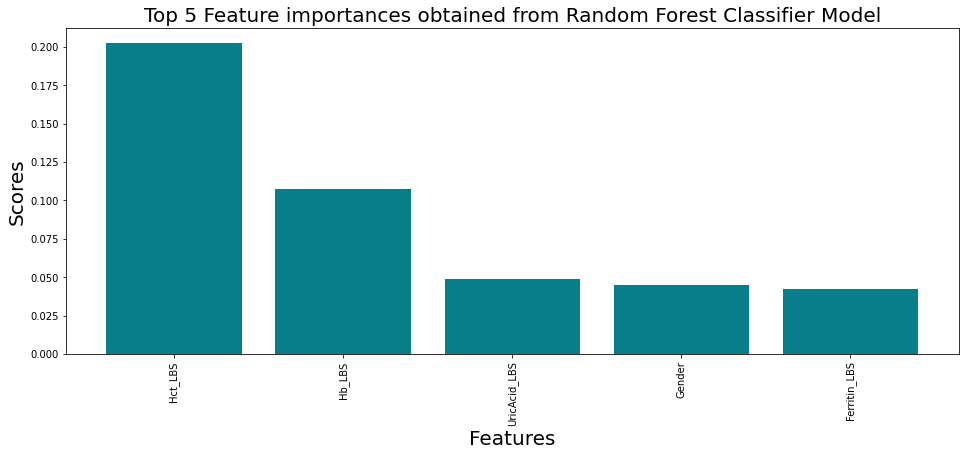

top five importancest features are sorted below: 
           Specs     Score
82       Hct_LBS  0.202235
81        Hb_LBS  0.107076
92  UricAcid_LBS  0.048533
0           x0_F  0.044932
84  Ferritin_LBS  0.042572
------------------------------------------------------------


In [ ]:
print('with Random Forest Builtin feature importance calculator')
rfc_feature_importances= rfc.feature_importances_
dfscores = pd.DataFrame(rfc_feature_importances)
dfcolumns = pd.DataFrame(scaled_df.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
plt.figure(figsize=(16,6))
#featureScores.replace('x8_No','como_HTN',inplace= True)
sc=featureScores.replace('x0_F','Gender')
plt.bar(x=sc.nlargest(5,'Score')['Specs'], height=sc.nlargest(5,'Score')['Score'], color='#087E8B')
plt.title('Top 5 Feature importances obtained from Random Forest Classifier Model', size=20)
plt.xlabel('Features',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()
print('top five importancest features are sorted below: ')
print(featureScores.nlargest(5,'Score'))  #print 5 best features
print("------------------------------------------------------------")


In [ ]:
L= featureScores.nlargest(5,'Score')['Specs'].to_numpy()
new_df= scaled_df[L]
new_df['target']= scaled_df['target']
undersample = NearMiss(version=2)
# transform the dataset
X, y = undersample.fit_resample(new_df.drop(['target'],axis=1), new_df['target'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20) # 80% training and 20% test

WITH n_estimators=1 (some random parameter value)
 Accuracy is : 0.8821656050955414
[[137  20]
 [ 17 140]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       157
           1       0.88      0.89      0.88       157

    accuracy                           0.88       314
   macro avg       0.88      0.88      0.88       314
weighted avg       0.88      0.88      0.88       314

WITH best n_estimators= 45
Mean Accuracy for the 10 iterations is: 0.9242038216560509
Mean Precision for the 10 iterations is: 0.8955076872444344
Mean Recall for the 10 iterations is: 0.9605095541401274
Mean F1 score for the 10 iterations is: 0.9268405794155402
Mean AUC for the 10 iterations is: 0.9422471499858007
Mean Precision score for 0 category is: 0.9575372648576194
Mean Precision score for 1 category is: 0.8955076872444344
Mean Recall score for 0 category is: 0.8878980891719745
Mean Recall score for 1 category is: 0.9605095541401274
Mean F1 score score 

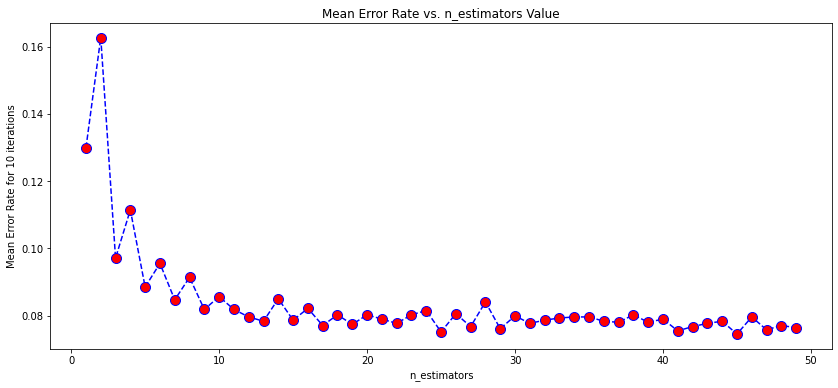

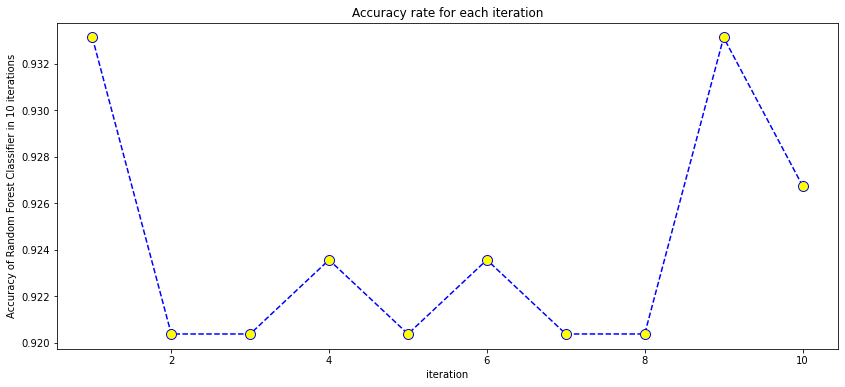

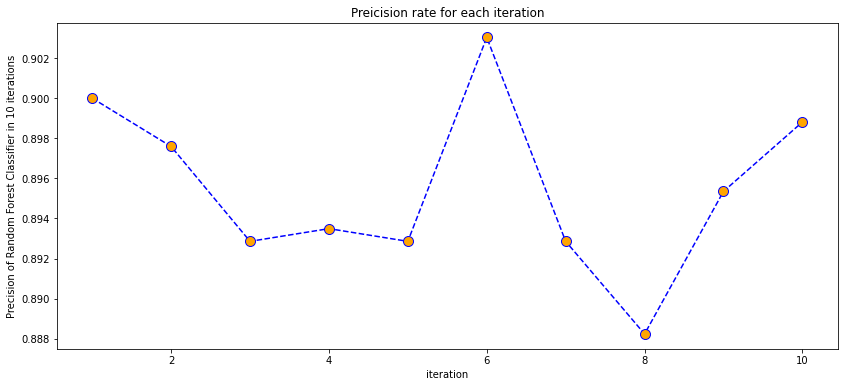

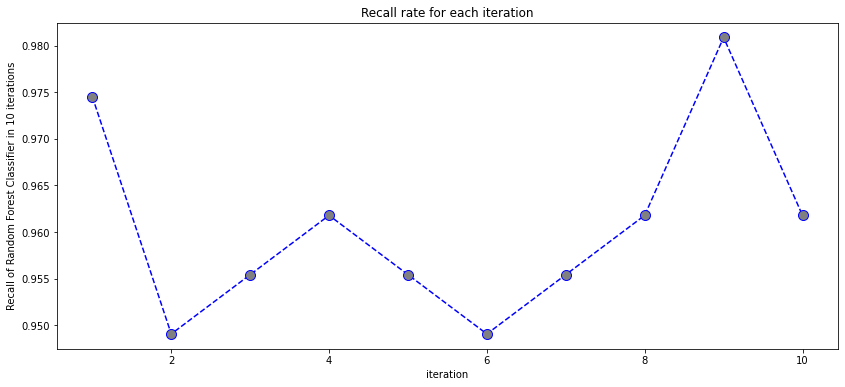

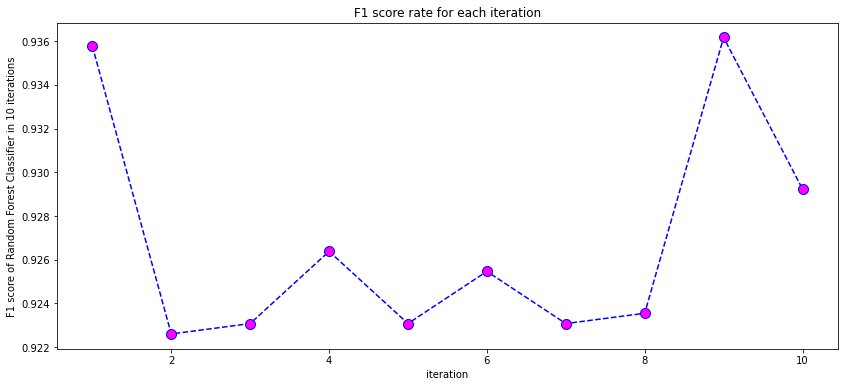

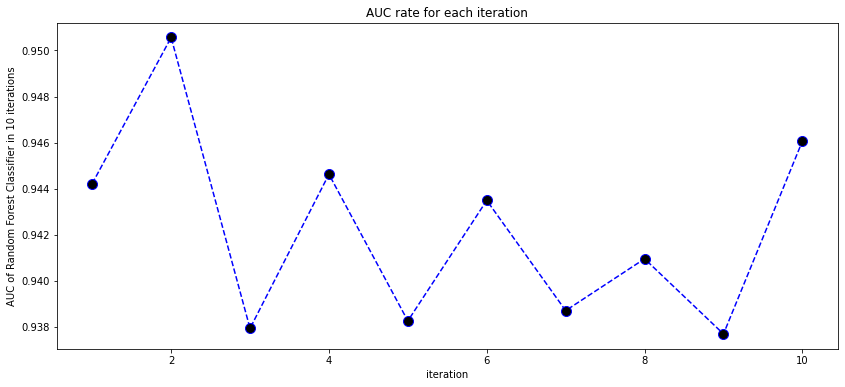

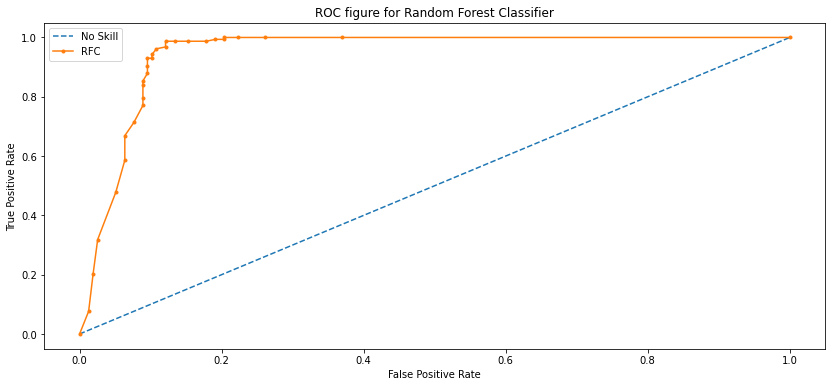

In [ ]:
rfc = RandomForestClassifier(n_estimators=1)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print('WITH n_estimators=1 (some random parameter value)')
acc = accuracy_score(y_test, rfc_pred)
print(" Accuracy is :", acc)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))
# Find best Parametr for RF
error_rate=[]
for i in range(1,50):
        iteration_error=[]
        #calculate mean of error rate for each senario
        for j in range(10):
            rfc = RandomForestClassifier(n_estimators=i)
            rfc.fit(X_train,y_train)
            pred_i = rfc.predict(X_test)
            iteration_error.append(np.mean(pred_i != y_test))
        error_rate.append(np.mean(iteration_error))
plt.figure(figsize=(14,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Mean Error Rate vs. n_estimators Value')
plt.xlabel('n_estimators')
plt.ylabel('Mean Error Rate for 10 iterations')#fit with best n_estimators parameter
best_n_estimators= min(range(len(error_rate)), key=error_rate.__getitem__) + 1
print('WITH best n_estimators=',best_n_estimators )
rfc = RandomForestClassifier(n_estimators=best_n_estimators)
Accuracy=[]
F1=[]
F1_0=[]
F1_1=[]
Precision=[]
AUC=[]
Precision_0=[]
Precision_1=[]
Recall=[]
Recall_0=[]
Recall_1=[]
for i in range(1,11):
  rfc.fit(X_train, y_train)
  rfc_pred = rfc.predict(X_test)
  probs = rfc.predict_proba(X_test)
  probs = probs[:, 1]
  auc=roc_auc_score(y_test, probs)
  AUC.append(auc)
  acc = accuracy_score(y_test, rfc_pred)
  precision= precision_score(y_test, rfc_pred)
  f1=f1_score(y_test, rfc_pred)
  recall=recall_score(y_test, rfc_pred)
  Accuracy.append(acc)
  Precision.append(precision)
  Recall.append(recall)
  F1.append(f1)
  reports=classification_report(y_test,rfc_pred,output_dict=True)
  Precision_0.append(reports['0']['precision'])
  Precision_1.append(reports['1']['precision'])
  F1_0.append(reports['0']['f1-score'])
  F1_1.append(reports['1']['f1-score'])
  Recall_0.append(reports['0']['recall'])
  Recall_1.append(reports['1']['recall'])
Final_scores_after= [round(np.mean(Accuracy),3),round(np.mean(Precision),3),round(np.mean(Recall),3),round(np.mean(F1),3),round(np.mean(AUC),3)]
rf_best_score=Final_scores_after
plt.figure(figsize=(14,6))
plt.plot(range(1,11),Accuracy,color='blue', linestyle='dashed', marker='o',markerfacecolor='yellow', markersize=10)
plt.title('Accuracy rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('Accuracy of Random Forest Classifier in 10 iterations')
print('Mean Accuracy for the 10 iterations is:',np.mean(Accuracy))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),Precision,color='blue', linestyle='dashed', marker='o',markerfacecolor='orange', markersize=10)
plt.title('Preicision rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('Precision of Random Forest Classifier in 10 iterations')
print('Mean Precision for the 10 iterations is:',np.mean(Precision))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),Recall,color='blue', linestyle='dashed', marker='o',markerfacecolor='grey', markersize=10)
plt.title('Recall rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('Recall of Random Forest Classifier in 10 iterations')
print('Mean Recall for the 10 iterations is:',np.mean(Recall))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),F1,color='blue', linestyle='dashed', marker='o',markerfacecolor='magenta', markersize=10)
plt.title('F1 score rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('F1 score of Random Forest Classifier in 10 iterations')
print('Mean F1 score for the 10 iterations is:',np.mean(F1))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),AUC,color='blue', linestyle='dashed', marker='o',markerfacecolor='black', markersize=10)
plt.title('AUC rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('AUC of Random Forest Classifier in 10 iterations')

print('Mean AUC for the 10 iterations is:',np.mean(AUC))
print('Mean Precision score for 0 category is:',np.mean(Precision_0))
print('Mean Precision score for 1 category is:',np.mean(Precision_1))
print('Mean Recall score for 0 category is:',np.mean(Recall_0))
print('Mean Recall score for 1 category is:',np.mean(Recall_1))
print('Mean F1 score score for 0 category is:',np.mean(F1_0))
print('Mean F1 score score for 1 category is:',np.mean(F1_1))
print(" Accuracy is :", acc)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

# ROC figure
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
rfc_probs = rfc.predict_proba(X_test)
# keep probabilities for the positive outcome only
rfc_probs = rfc_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
rfc_auc = roc_auc_score(y_test, rfc_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest Classifier: ROC AUC=%.3f' % (rfc_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_probs)
# plot the roc curve for the model
plt.figure(figsize=(14,6))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='RFC')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC figure for Random Forest Classifier')
# show the legend
plt.legend()
# show the plot
plt.show()


before feature selection classifications scores are: [0.828, 0.802, 0.864, 0.832, 0.909]
after feature selection classifications scores are: [0.924, 0.896, 0.961, 0.927, 0.942]


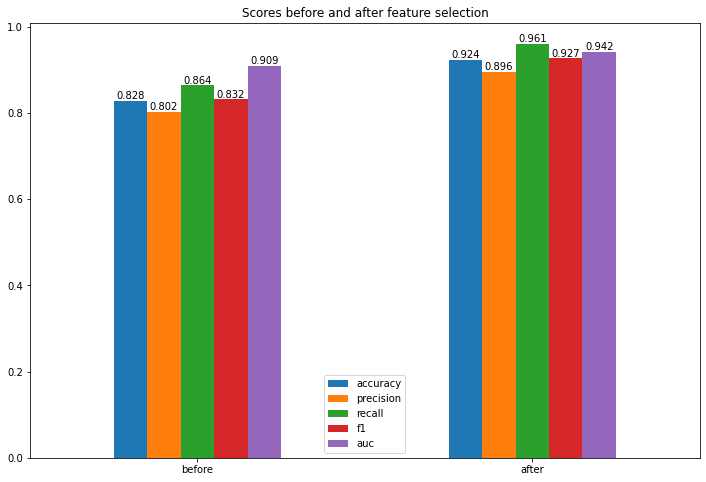

In [ ]:
accs=[Final_scores[0],Final_scores_after[0]]
precisions=[Final_scores[1],Final_scores_after[1]]
recalls=[Final_scores[2],Final_scores_after[2]]
f1s=[Final_scores[3],Final_scores_after[3]]
aucs=[Final_scores[4],Final_scores_after[4]]
index=['before','after']
df = pd.DataFrame({'accuracy': accs,
                   'precision': precisions,'recall': recalls,'f1': f1s,'auc': aucs}, index=index)
ax = df.plot.bar(rot=0,figsize=(12,8),title='Scores before and after feature selection')
for container in ax.containers:
    ax.bar_label(container)
print('before feature selection classifications scores are:' ,Final_scores)
print('after feature selection classifications scores are:' ,Final_scores_after)

Support Vector Machines


In [ ]:
undersample = NearMiss(version=2)
# transform the dataset
X, y = undersample.fit_resample(scaled_df.drop(['target'],axis=1), scaled_df['target'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20) # 80% training and 20% test
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({1: 639, 0: 615})


With diffault parameters: 

 Accuracy is : 0.8757961783439491
[[143  26]
 [ 13 132]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       169
           1       0.84      0.91      0.87       145

    accuracy                           0.88       314
   macro avg       0.88      0.88      0.88       314
weighted avg       0.88      0.88      0.88       314

best parameter set is: {'C': 5, 'gamma': 'auto', 'kernel': 'rbf'}
Mean Accuracy for the 10 iterations is: 0.8917197452229301
Mean Precision for the 10 iterations is: 0.8490566037735849
Mean Recall for the 10 iterations is: 0.9310344827586207
Mean F1 score for the 10 iterations is: 0.8881578947368421
Mean AUC for the 10 iterations is: 0.9238114670475411
Mean Precision score for 0 category is: 0.9354838709677418
Mean Precision score for 1 category is: 0.8490566037735849
Mean Recall score for 0 category is: 0.8579881656804733
Mean Recall score for 1 category is: 0.9310344827586207
Mea

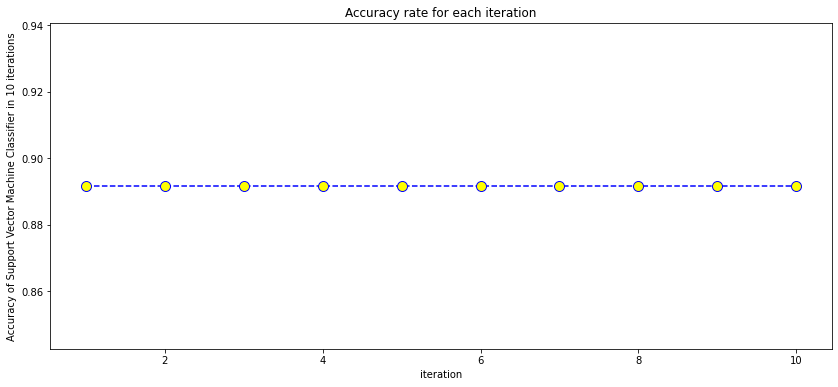

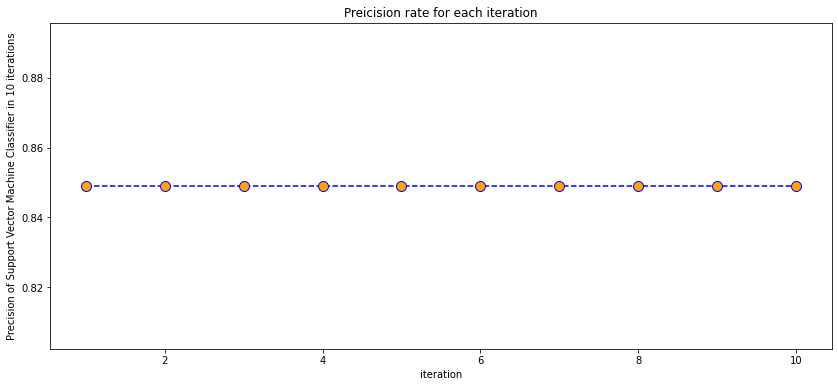

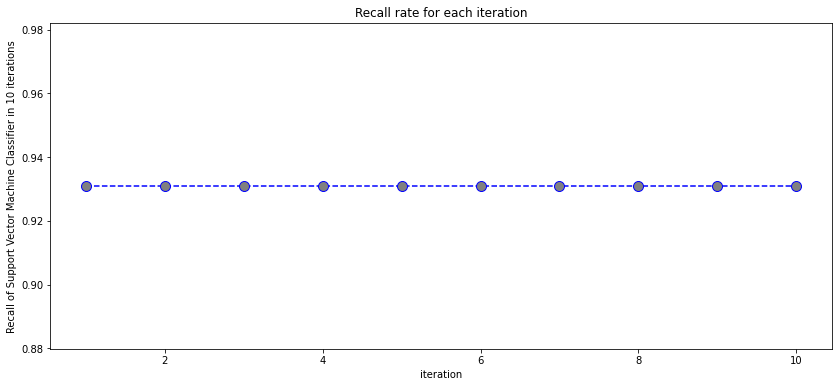

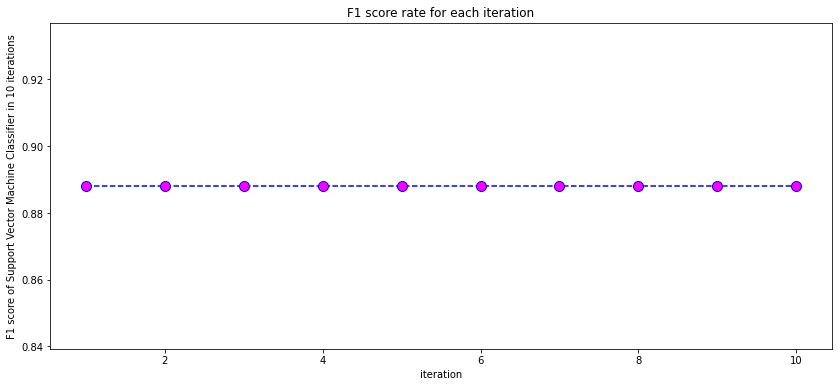

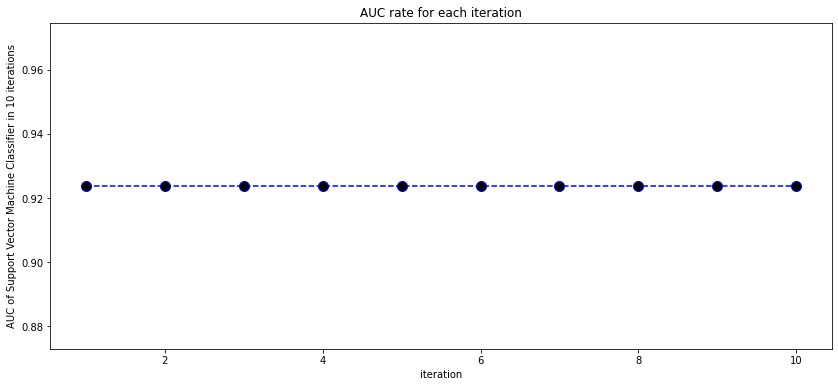

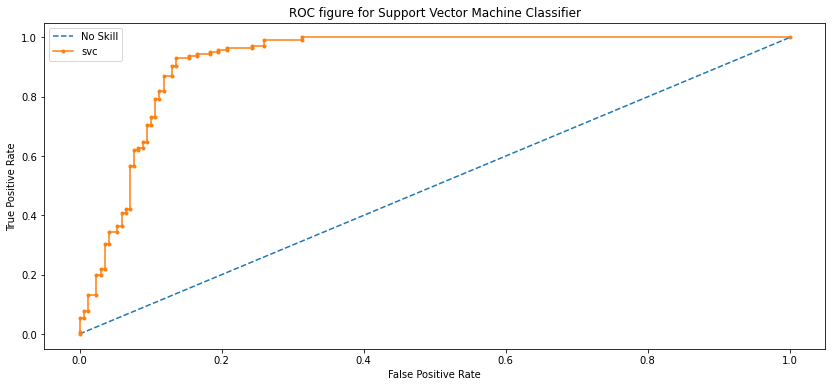

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
acc = accuracy_score(y_test, svc_pred)
print('With diffault parameters: \n')
print(" Accuracy is :", acc)
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))
# Find best Parameter set
svm_param = {"C": [1,5,10, 15, 20, 50, 100, 200, 500],
             "kernel" :[ 'rbf', 'sigmoid'],
              "gamma": ["scale","auto"]}
grid_svm = GridSearchCV(estimator=svc , param_grid = svm_param )
grid_svm.fit(X_train, y_train)
print('best parameter set is:',grid_svm.best_params_)
best_C= grid_svm.best_params_["C"]
best_kernel= grid_svm.best_params_['kernel']
best_gamma= grid_svm.best_params_['gamma']
# fit best parameter set
svc=SVC(C=best_C,kernel = best_kernel, gamma= best_gamma,probability=True,random_state=20)
Accuracy=[]
F1=[]
F1_0=[]
F1_1=[]
Precision=[]
AUC=[]
Precision_0=[]
Precision_1=[]
Recall=[]
Recall_0=[]
Recall_1=[]
for i in range(1,11):
  svc.fit(X_train, y_train)
  svc_pred = svc.predict(X_test)
  probs = svc.predict_proba(X_test)
  probs = probs[:, 1]
  auc=roc_auc_score(y_test, probs)
  AUC.append(auc)
  acc = accuracy_score(y_test, svc_pred)
  precision= precision_score(y_test, svc_pred)
  f1=f1_score(y_test, svc_pred)
  recall=recall_score(y_test, svc_pred)
  Accuracy.append(acc)
  Precision.append(precision)
  Recall.append(recall)
  F1.append(f1)
  reports=classification_report(y_test,svc_pred,output_dict=True)
  Precision_0.append(reports['0']['precision'])
  Precision_1.append(reports['1']['precision'])
  F1_0.append(reports['0']['f1-score'])
  F1_1.append(reports['1']['f1-score'])
  Recall_0.append(reports['0']['recall'])
  Recall_1.append(reports['1']['recall'])
Final_scores= [round(np.mean(Accuracy),3),round(np.mean(Precision),3),round(np.mean(Recall),3),round(np.mean(F1),3),round(np.mean(AUC),3)]
plt.figure(figsize=(14,6))
plt.plot(range(1,11),Accuracy,color='blue', linestyle='dashed', marker='o',markerfacecolor='yellow', markersize=10)
plt.title('Accuracy rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('Accuracy of Support Vector Machine Classifier in 10 iterations')
print('Mean Accuracy for the 10 iterations is:',np.mean(Accuracy))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),Precision,color='blue', linestyle='dashed', marker='o',markerfacecolor='orange', markersize=10)
plt.title('Preicision rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('Precision of Support Vector Machine Classifier in 10 iterations')
print('Mean Precision for the 10 iterations is:',np.mean(Precision))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),Recall,color='blue', linestyle='dashed', marker='o',markerfacecolor='grey', markersize=10)
plt.title('Recall rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('Recall of Support Vector Machine Classifier in 10 iterations')
print('Mean Recall for the 10 iterations is:',np.mean(Recall))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),F1,color='blue', linestyle='dashed', marker='o',markerfacecolor='magenta', markersize=10)
plt.title('F1 score rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('F1 score of Support Vector Machine Classifier in 10 iterations')
print('Mean F1 score for the 10 iterations is:',np.mean(F1))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),AUC,color='blue', linestyle='dashed', marker='o',markerfacecolor='black', markersize=10)
plt.title('AUC rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('AUC of Support Vector Machine Classifier in 10 iterations')

print('Mean AUC for the 10 iterations is:',np.mean(AUC))
print('Mean Precision score for 0 category is:',np.mean(Precision_0))
print('Mean Precision score for 1 category is:',np.mean(Precision_1))
print('Mean Recall score for 0 category is:',np.mean(Recall_0))
print('Mean Recall score for 1 category is:',np.mean(Recall_1))
print('Mean F1 score score for 0 category is:',np.mean(F1_0))
print('Mean F1 score score for 1 category is:',np.mean(F1_1))
print(" Accuracy is :", acc)
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

# ROC figure
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
svc_probs = svc.predict_proba(X_test)
# keep probabilities for the positive outcome only
svc_probs = svc_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
svc_auc = roc_auc_score(y_test, svc_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Support Vector Machine Classifier: ROC AUC=%.3f' % (svc_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)
# plot the roc curve for the model
plt.figure(figsize=(14,6))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(svc_fpr, svc_tpr, marker='.', label='svc')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC figure for Support Vector Machine Classifier')
# show the legend
plt.legend()
# show the plot
plt.show()


In [ ]:
L= featureScores.nlargest(5,'Score')['Specs'].to_numpy()
new_df= scaled_df[L]
new_df['target']= scaled_df['target']
undersample = NearMiss(version=2)
# transform the dataset
X, y = undersample.fit_resample(new_df.drop(['target'],axis=1), new_df['target'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30) # 70% training and 30% test

With diffault parameters: 

 Accuracy is : 0.9044585987261147
[[198  41]
 [  4 228]]
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       239
           1       0.85      0.98      0.91       232

    accuracy                           0.90       471
   macro avg       0.91      0.91      0.90       471
weighted avg       0.91      0.90      0.90       471

best parameter set is: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Mean Accuracy for the 10 iterations is: 0.9044585987261146
Mean Precision for the 10 iterations is: 0.8475836431226765
Mean Recall for the 10 iterations is: 0.9827586206896551
Mean F1 score for the 10 iterations is: 0.9101796407185632
Mean AUC for the 10 iterations is: 0.9533617082672053
Mean Precision score for 0 category is: 0.9801980198019802
Mean Precision score for 1 category is: 0.8475836431226765
Mean Recall score for 0 category is: 0.8284518828451883
Mean Recall score for 1 category is: 0.9827586206896551
Me

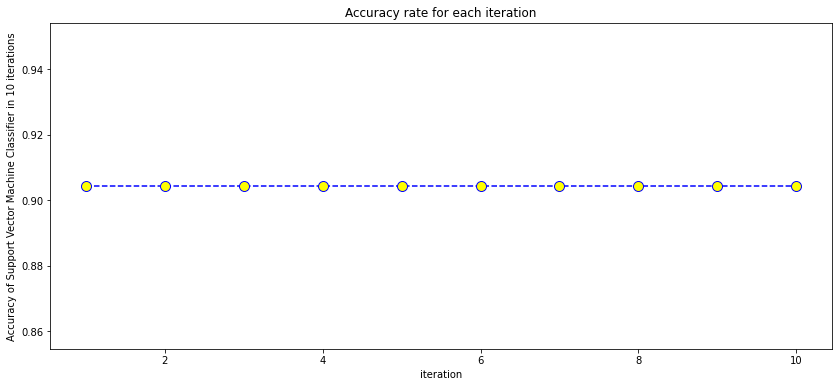

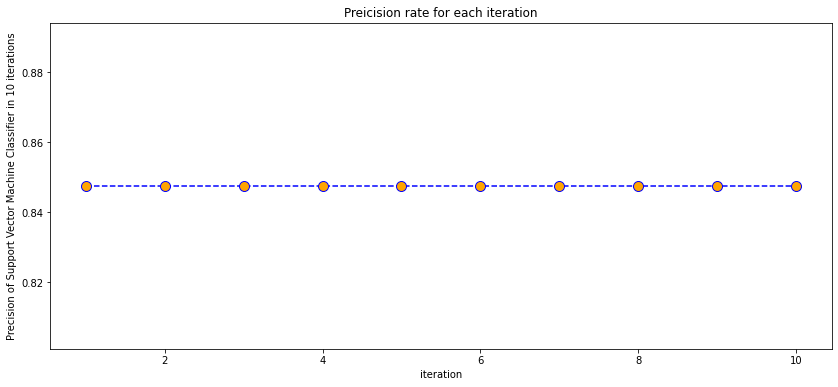

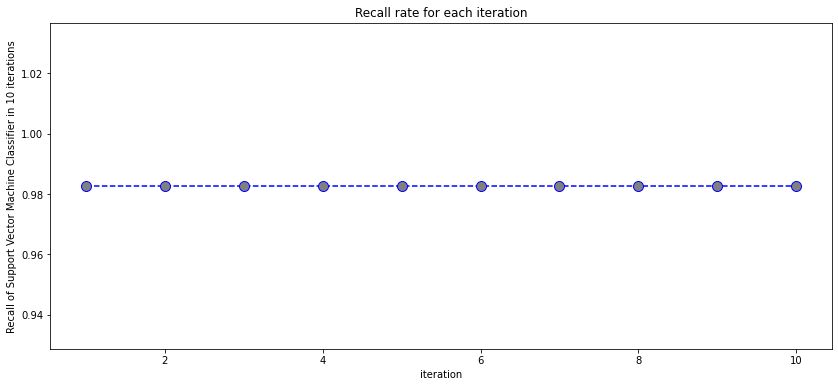

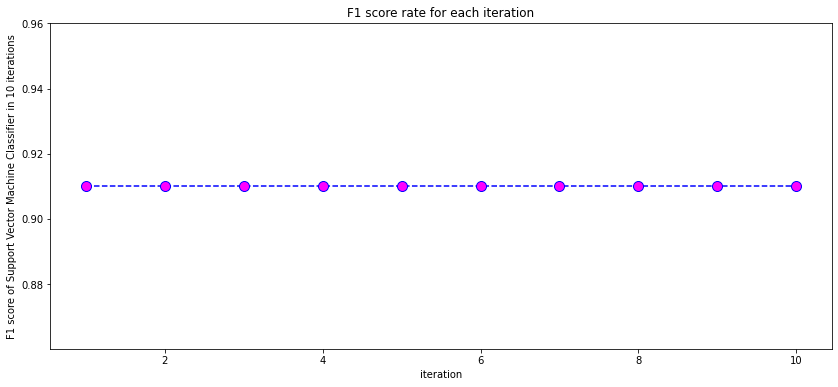

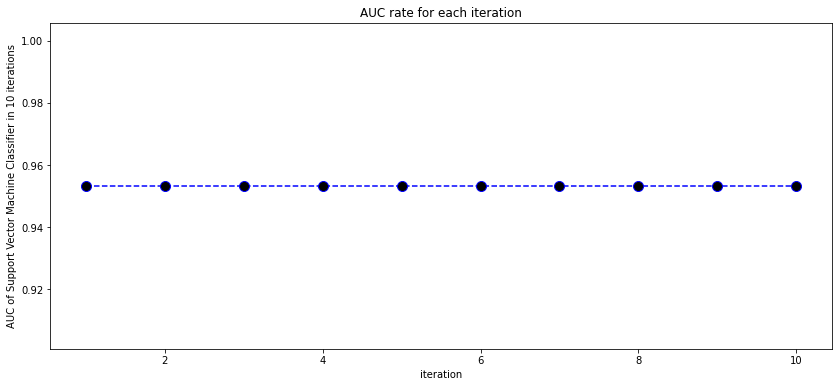

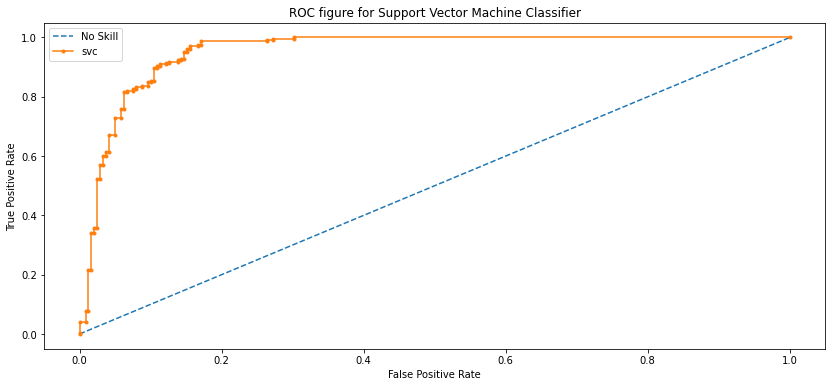

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
acc = accuracy_score(y_test, svc_pred)
print('With diffault parameters: \n')
print(" Accuracy is :", acc)
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))
# Find best Parameter set
svm_param = {"C": [1,5,10, 15, 20, 50, 100, 200, 500],
             "kernel" :[ 'rbf', 'sigmoid'],
              "gamma": ["scale","auto"]}
grid_svm = GridSearchCV(estimator=svc , param_grid = svm_param )
grid_svm.fit(X_train, y_train)
print('best parameter set is:',grid_svm.best_params_)
best_C= grid_svm.best_params_["C"]
best_kernel= grid_svm.best_params_['kernel']
best_gamma= grid_svm.best_params_['gamma']
# fit best parameter set
svc=SVC(C=best_C,kernel = best_kernel, gamma= best_gamma,probability=True,random_state=20)
Accuracy=[]
F1=[]
F1_0=[]
F1_1=[]
Precision=[]
AUC=[]
Precision_0=[]
Precision_1=[]
Recall=[]
Recall_0=[]
Recall_1=[]
for i in range(1,11):
  svc.fit(X_train, y_train)
  svc_pred = svc.predict(X_test)
  probs = svc.predict_proba(X_test)
  probs = probs[:, 1]
  auc=roc_auc_score(y_test, probs)
  AUC.append(auc)
  acc = accuracy_score(y_test, svc_pred)
  precision= precision_score(y_test, svc_pred)
  f1=f1_score(y_test, svc_pred)
  recall=recall_score(y_test, svc_pred)
  Accuracy.append(acc)
  Precision.append(precision)
  Recall.append(recall)
  F1.append(f1)
  reports=classification_report(y_test,svc_pred,output_dict=True)
  Precision_0.append(reports['0']['precision'])
  Precision_1.append(reports['1']['precision'])
  F1_0.append(reports['0']['f1-score'])
  F1_1.append(reports['1']['f1-score'])
  Recall_0.append(reports['0']['recall'])
  Recall_1.append(reports['1']['recall'])
Final_scores_after= [round(np.mean(Accuracy),3),round(np.mean(Precision),3),round(np.mean(Recall),3),round(np.mean(F1),3),round(np.mean(AUC),3)]
svc_best_score=Final_scores_after
plt.figure(figsize=(14,6))
plt.plot(range(1,11),Accuracy,color='blue', linestyle='dashed', marker='o',markerfacecolor='yellow', markersize=10)
plt.title('Accuracy rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('Accuracy of Support Vector Machine Classifier in 10 iterations')
print('Mean Accuracy for the 10 iterations is:',np.mean(Accuracy))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),Precision,color='blue', linestyle='dashed', marker='o',markerfacecolor='orange', markersize=10)
plt.title('Preicision rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('Precision of Support Vector Machine Classifier in 10 iterations')
print('Mean Precision for the 10 iterations is:',np.mean(Precision))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),Recall,color='blue', linestyle='dashed', marker='o',markerfacecolor='grey', markersize=10)
plt.title('Recall rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('Recall of Support Vector Machine Classifier in 10 iterations')
print('Mean Recall for the 10 iterations is:',np.mean(Recall))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),F1,color='blue', linestyle='dashed', marker='o',markerfacecolor='magenta', markersize=10)
plt.title('F1 score rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('F1 score of Support Vector Machine Classifier in 10 iterations')
print('Mean F1 score for the 10 iterations is:',np.mean(F1))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),AUC,color='blue', linestyle='dashed', marker='o',markerfacecolor='black', markersize=10)
plt.title('AUC rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('AUC of Support Vector Machine Classifier in 10 iterations')

print('Mean AUC for the 10 iterations is:',np.mean(AUC))
print('Mean Precision score for 0 category is:',np.mean(Precision_0))
print('Mean Precision score for 1 category is:',np.mean(Precision_1))
print('Mean Recall score for 0 category is:',np.mean(Recall_0))
print('Mean Recall score for 1 category is:',np.mean(Recall_1))
print('Mean F1 score score for 0 category is:',np.mean(F1_0))
print('Mean F1 score score for 1 category is:',np.mean(F1_1))
print(" Accuracy is :", acc)
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

# ROC figure
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
svc_probs = svc.predict_proba(X_test)
# keep probabilities for the positive outcome only
svc_probs = svc_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
svc_auc = roc_auc_score(y_test, svc_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Support Vector Machine Classifier: ROC AUC=%.3f' % (svc_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)
# plot the roc curve for the model
plt.figure(figsize=(14,6))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(svc_fpr, svc_tpr, marker='.', label='svc')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC figure for Support Vector Machine Classifier')
# show the legend
plt.legend()
# show the plot
plt.show()


before feature selection classifications scores are: [0.892, 0.849, 0.931, 0.888, 0.924]
after feature selection classifications scores are: [0.904, 0.848, 0.983, 0.91, 0.953]


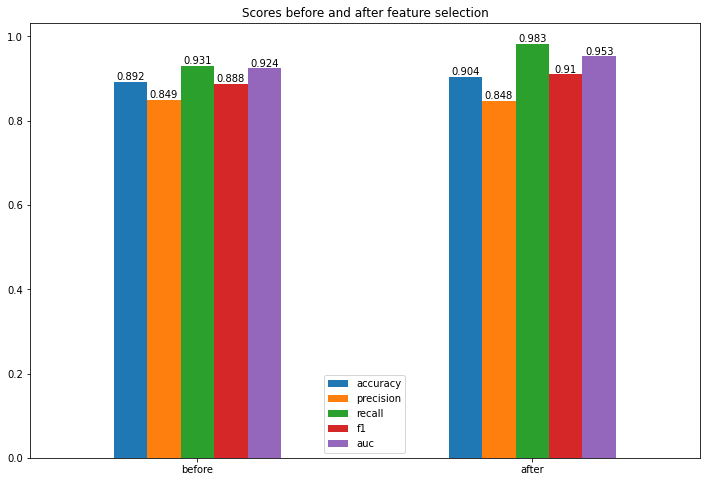

In [ ]:
accs=[Final_scores[0],Final_scores_after[0]]
precisions=[Final_scores[1],Final_scores_after[1]]
recalls=[Final_scores[2],Final_scores_after[2]]
f1s=[Final_scores[3],Final_scores_after[3]]
aucs=[Final_scores[4],Final_scores_after[4]]
index=['before','after']
df = pd.DataFrame({'accuracy': accs,
                   'precision': precisions,'recall': recalls,'f1': f1s,'auc': aucs}, index=index)
ax = df.plot.bar(rot=0,figsize=(12,8),title='Scores before and after feature selection')
for container in ax.containers:
    ax.bar_label(container)
print('before feature selection classifications scores are:' ,Final_scores)
print('after feature selection classifications scores are:' ,Final_scores_after)

KNN


In [ ]:
undersample = NearMiss(version=2)
# transform the dataset
X, y = undersample.fit_resample(unscaled_df.drop(['target'],axis=1), unscaled_df['target'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20) # 70% training and 30% test
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 629, 1: 625})


when n_neighbors parameter is: 1 (its just some random number)
 Accuracy is : 0.8439490445859873
[[130  25]
 [ 24 135]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       155
           1       0.84      0.85      0.85       159

    accuracy                           0.84       314
   macro avg       0.84      0.84      0.84       314
weighted avg       0.84      0.84      0.84       314

WITH best n_neighbors= 30
Mean Accuracy for the 10 iterations is: 0.8853503184713375
Mean Precision for the 10 iterations is: 0.8360655737704918
Mean Recall for the 10 iterations is: 0.9622641509433961
Mean F1-Score for the 10 iterations is: 0.8947368421052632
Mean AUC for the 10 iterations is: 0.9292351389734227
Mean Precision score for 0 category is: 0.9541984732824428
Mean Precision score for 1 category is: 0.8360655737704918
Mean Recall score for 0 category is: 0.8064516129032258
Mean Recall score for 1 category is: 0.9622641509433961
Mean F1 

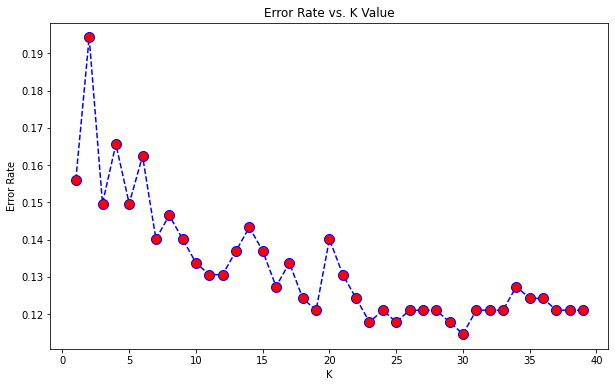

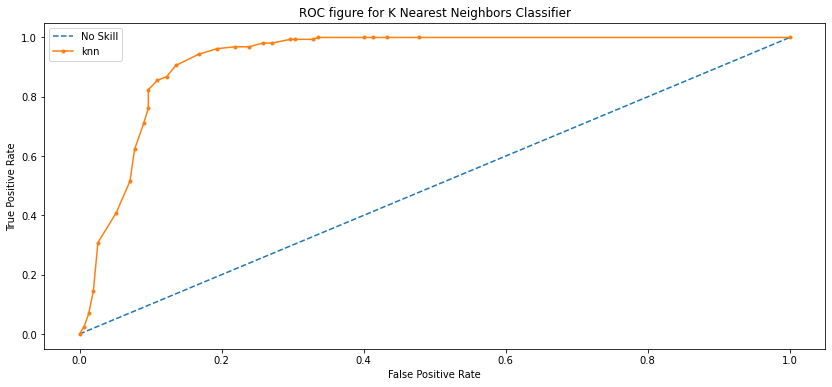

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print( "when n_neighbors parameter is: 1 (its just some random number)")
acc = accuracy_score(y_test, pred)
print(" Accuracy is :", acc)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
error_rate = []
# plot erros for different parameter values to get an overall insight
for i in range(1,40):

        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
best_n_neighbors= min(range(len(error_rate)), key=error_rate.__getitem__) + 1
print('WITH best n_neighbors=',best_n_neighbors )
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
Accuracy=[]
F1=[]
F1_0=[]
F1_1=[]
Precision=[]
AUC=[]
Precision_0=[]
Precision_1=[]
Recall=[]
Recall_0=[]
Recall_1=[]
for i in range(1,11):
  knn.fit(X_train, y_train)
  knn_pred = knn.predict(X_test)
  probs = knn.predict_proba(X_test)
  probs = probs[:, 1]
  auc=roc_auc_score(y_test, probs)
  AUC.append(auc)
  acc = accuracy_score(y_test, knn_pred)
  precision= precision_score(y_test, knn_pred)
  f1=f1_score(y_test, knn_pred)
  recall=recall_score(y_test, knn_pred)
  Accuracy.append(acc)
  Precision.append(precision)
  Recall.append(recall)
  F1.append(f1)
  reports=classification_report(y_test,knn_pred,output_dict=True)
  Precision_0.append(reports['0']['precision'])
  Precision_1.append(reports['1']['precision'])
  F1_0.append(reports['0']['f1-score'])
  F1_1.append(reports['1']['f1-score'])
  Recall_0.append(reports['0']['recall'])
  Recall_1.append(reports['1']['recall'])
print('Mean Accuracy for the 10 iterations is:',np.mean(Accuracy))
print('Mean Precision for the 10 iterations is:',np.mean(Precision))
print('Mean Recall for the 10 iterations is:',np.mean(Recall))
print('Mean F1-Score for the 10 iterations is:',np.mean(F1))
print('Mean AUC for the 10 iterations is:',np.mean(AUC))
print('Mean Precision score for 0 category is:',np.mean(Precision_0))
print('Mean Precision score for 1 category is:',np.mean(Precision_1))
print('Mean Recall score for 0 category is:',np.mean(Recall_0))
print('Mean Recall score for 1 category is:',np.mean(Recall_1))
print('Mean F1 score score for 0 category is:',np.mean(F1_0))
print('Mean F1 score score for 1 category is:',np.mean(F1_1))
print(" Accuracy is :", acc)
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))
Final_scores= [round(np.mean(Accuracy),3),round(np.mean(Precision),3),round(np.mean(Recall),3),round(np.mean(F1),3),round(np.mean(AUC),3)]
# ROC figure
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
knn_probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
knn_probs = knn_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('K Nearest Neighbors Classifier: ROC AUC=%.3f' % (knn_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
# plot the roc curve for the model
plt.figure(figsize=(14,6))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(knn_fpr, knn_tpr, marker='.', label='knn')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC figure for K Nearest Neighbors Classifier')
# show the legend
plt.legend()
# show the plot
plt.show()


In [ ]:
L= featureScores.nlargest(5,'Score')['Specs'].to_numpy()
new_df= unscaled_df[L]
new_df['target']= unscaled_df['target']
undersample = NearMiss(version=2)
# transform the dataset
X, y = undersample.fit_resample(new_df.drop(['target'],axis=1), new_df['target'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30) # 70% training and 30% test

when n_neighbors parameter is: 1 (its just some random number)
 Accuracy is : 0.8598726114649682
[[199  36]
 [ 30 206]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       235
           1       0.85      0.87      0.86       236

    accuracy                           0.86       471
   macro avg       0.86      0.86      0.86       471
weighted avg       0.86      0.86      0.86       471

WITH best n_neighbors= 13
Mean Accuracy for the 10 iterations is: 0.9214437367303608
Mean Precision for the 10 iterations is: 0.8644688644688646
Mean Recall for the 10 iterations is: 1.0
Mean F1-Score for the 10 iterations is: 0.9273084479371315
Mean AUC for the 10 iterations is: 0.9276685899747564
Mean Precision score for 0 category is: 1.0
Mean Precision score for 1 category is: 0.8644688644688646
Mean Recall score for 0 category is: 0.8425531914893616
Mean Recall score for 1 category is: 1.0
Mean F1 score score for 0 category is: 0.914549653579

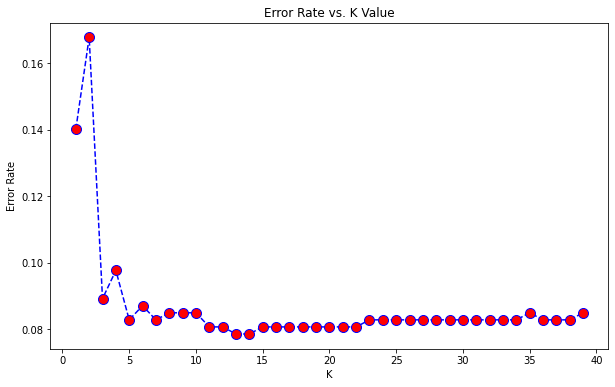

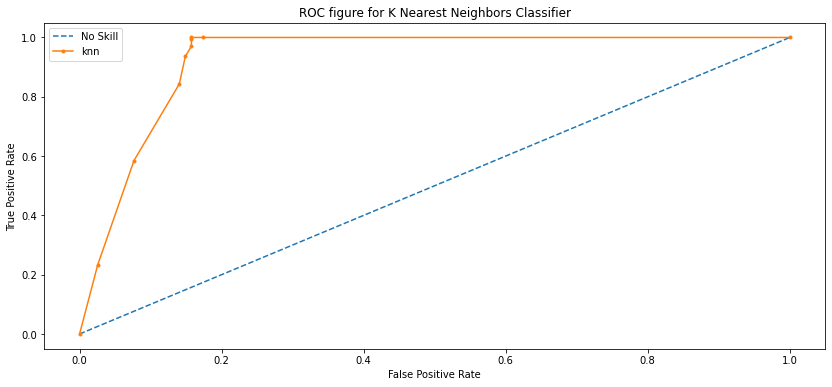

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print( "when n_neighbors parameter is: 1 (its just some random number)")
acc = accuracy_score(y_test, pred)
print(" Accuracy is :", acc)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
error_rate = []
# plot erros for different parameter values to get an overall insight
for i in range(1,40):

        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
best_n_neighbors= min(range(len(error_rate)), key=error_rate.__getitem__) + 1
print('WITH best n_neighbors=',best_n_neighbors )
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
Accuracy=[]
F1=[]
F1_0=[]
F1_1=[]
Precision=[]
AUC=[]
Precision_0=[]
Precision_1=[]
Recall=[]
Recall_0=[]
Recall_1=[]
for i in range(1,11):
  knn.fit(X_train, y_train)
  knn_pred = knn.predict(X_test)
  probs = knn.predict_proba(X_test)
  probs = probs[:, 1]
  auc=roc_auc_score(y_test, probs)
  AUC.append(auc)
  acc = accuracy_score(y_test, knn_pred)
  precision= precision_score(y_test, knn_pred)
  f1=f1_score(y_test, knn_pred)
  recall=recall_score(y_test, knn_pred)
  Accuracy.append(acc)
  Precision.append(precision)
  Recall.append(recall)
  F1.append(f1)
  reports=classification_report(y_test,knn_pred,output_dict=True)
  Precision_0.append(reports['0']['precision'])
  Precision_1.append(reports['1']['precision'])
  F1_0.append(reports['0']['f1-score'])
  F1_1.append(reports['1']['f1-score'])
  Recall_0.append(reports['0']['recall'])
  Recall_1.append(reports['1']['recall'])
Final_scores_after= [round(np.mean(Accuracy),3),round(np.mean(Precision),3),round(np.mean(Recall),3),round(np.mean(F1),3),round(np.mean(AUC),3)]
knn_best_score=Final_scores_after
print('Mean Accuracy for the 10 iterations is:',np.mean(Accuracy))
print('Mean Precision for the 10 iterations is:',np.mean(Precision))
print('Mean Recall for the 10 iterations is:',np.mean(Recall))
print('Mean F1-Score for the 10 iterations is:',np.mean(F1))
print('Mean AUC for the 10 iterations is:',np.mean(AUC))
print('Mean Precision score for 0 category is:',np.mean(Precision_0))
print('Mean Precision score for 1 category is:',np.mean(Precision_1))
print('Mean Recall score for 0 category is:',np.mean(Recall_0))
print('Mean Recall score for 1 category is:',np.mean(Recall_1))
print('Mean F1 score score for 0 category is:',np.mean(F1_0))
print('Mean F1 score score for 1 category is:',np.mean(F1_1))
print(" Accuracy is :", acc)
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

# ROC figure
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
knn_probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
knn_probs = knn_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('K Nearest Neighbors Classifier: ROC AUC=%.3f' % (knn_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
# plot the roc curve for the model
plt.figure(figsize=(14,6))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(knn_fpr, knn_tpr, marker='.', label='knn')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC figure for K Nearest Neighbors Classifier')
# show the legend
plt.legend()
# show the plot
plt.show()


before feature selection classifications scores are: [0.834, 0.783, 0.907, 0.84, 0.897]
after feature selection classifications scores are: [0.921, 0.864, 1.0, 0.927, 0.928]


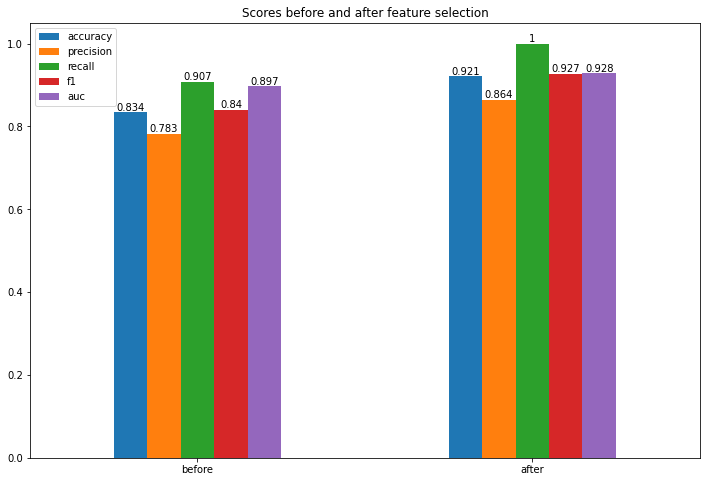

In [ ]:
accs=[Final_scores[0],Final_scores_after[0]]
precisions=[Final_scores[1],Final_scores_after[1]]
recalls=[Final_scores[2],Final_scores_after[2]]
f1s=[Final_scores[3],Final_scores_after[3]]
aucs=[Final_scores[4],Final_scores_after[4]]
index=['before','after']
df = pd.DataFrame({'accuracy': accs,
                   'precision': precisions,'recall': recalls,'f1': f1s,'auc': aucs}, index=index)
ax = df.plot.bar(rot=0,figsize=(12,8),title='Scores before and after feature selection')
for container in ax.containers:
    ax.bar_label(container)
print('before feature selection classifications scores are:' ,Final_scores)
print('after feature selection classifications scores are:' ,Final_scores_after)

In [ ]:
undersample = NearMiss(version=2)
# transform the dataset
X, y = undersample.fit_resample(scaled_df.drop(['target'],axis=1), scaled_df['target'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20) # 80% training and 20% test
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 628, 1: 626})


with some random n_estimators like 50 for example:
 Accuracy is : 0.8248407643312102
[[126  30]
 [ 25 133]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       156
           1       0.82      0.84      0.83       158

    accuracy                           0.82       314
   macro avg       0.83      0.82      0.82       314
weighted avg       0.83      0.82      0.82       314

WITH best n_neighbors= 43
Mean Accuracy for the 10 iterations is: 0.8343949044585987
Mean Precision for the 10 iterations is: 0.8231707317073169
Mean Recall for the 10 iterations is: 0.8544303797468353
Mean F1 score for the 10 iterations is: 0.8385093167701863
Mean AUC for the 10 iterations is: 0.89930217461863
Mean Precision score for 0 category is: 0.8466666666666667
Mean Precision score for 1 category is: 0.8231707317073169
Mean Recall score for 0 category is: 0.8141025641025641
Mean Recall score for 1 category is: 0.8544303797468353
Mean F1 score score fo

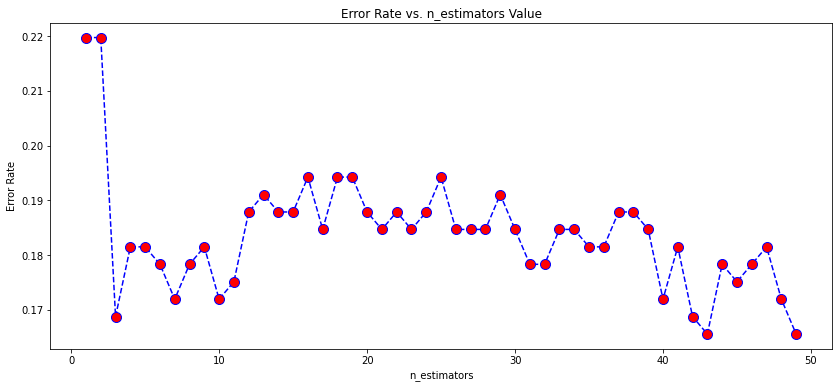

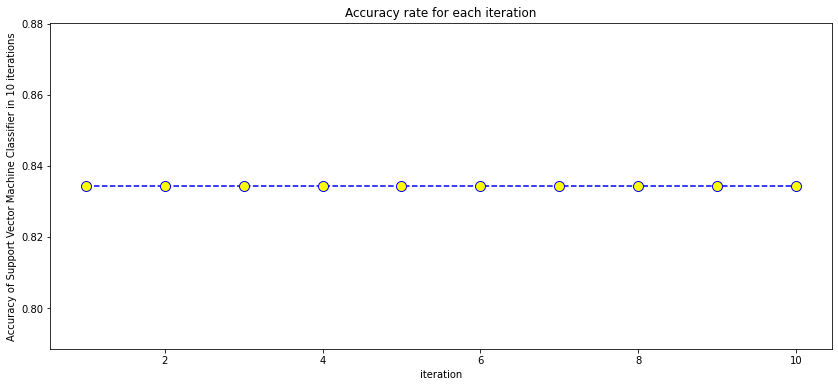

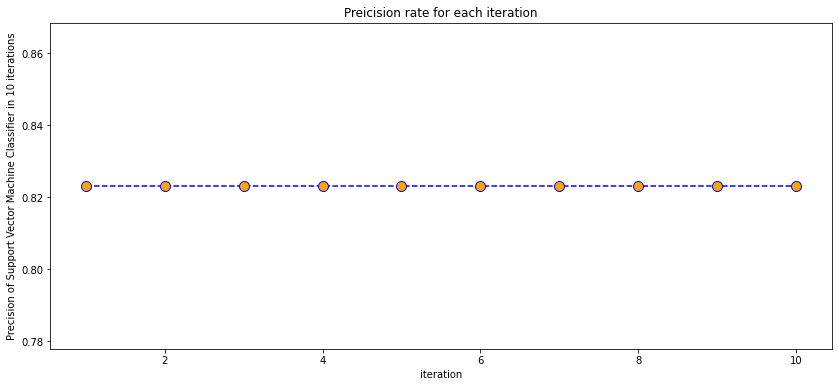

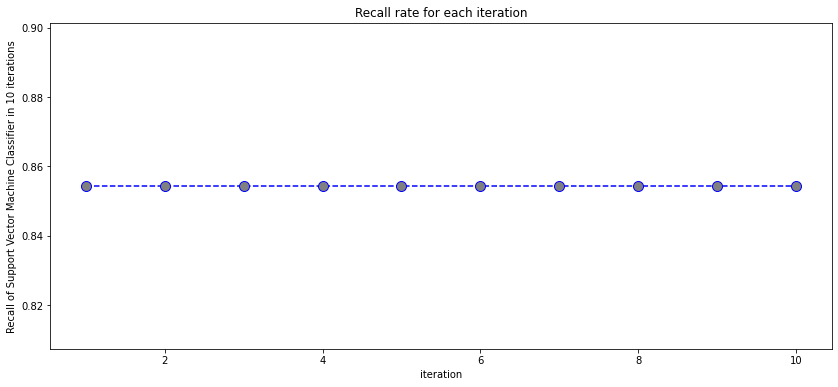

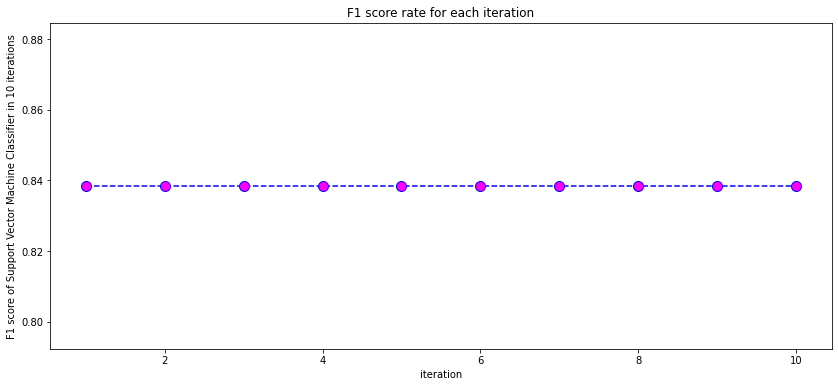

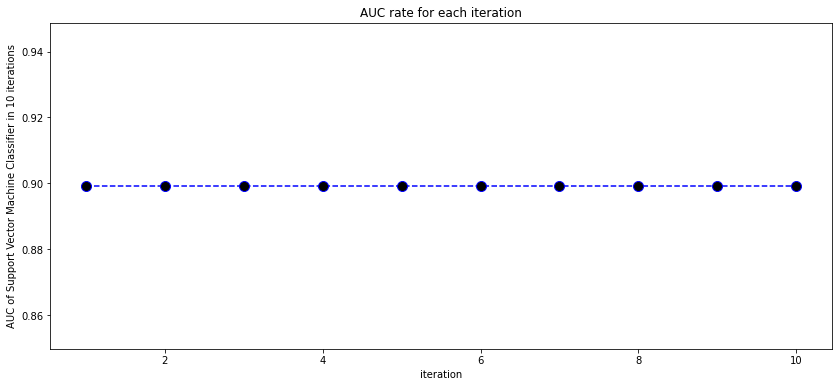

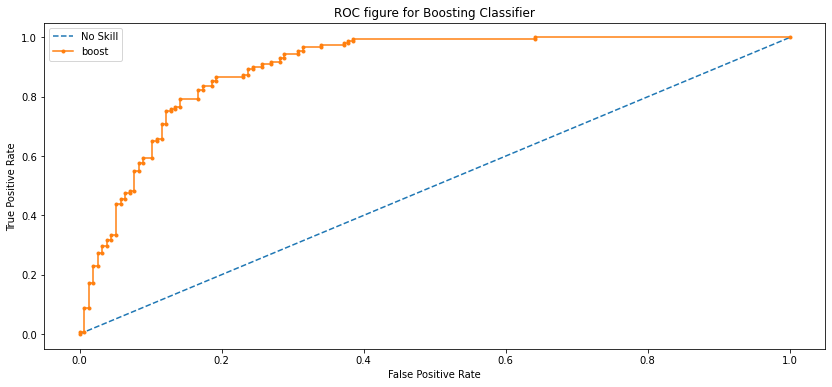

In [ ]:
boost=AdaBoostClassifier(n_estimators=50)
boost.fit(X_train, y_train)
boost_pred = boost.predict(X_test)
acc = accuracy_score(y_test, boost_pred)
print('with some random n_estimators like 50 for example:')
print(" Accuracy is :", acc)
print(confusion_matrix(y_test,boost_pred))
print(classification_report(y_test,boost_pred))
# Find best Parameter set
error_rate=[]
for i in range(1,50):
        iteration_error=[]
        for j in range(4):
            bag = AdaBoostClassifier(n_estimators=i)
            bag.fit(X_train,y_train)
            pred_i = bag.predict(X_test)
            iteration_error.append(np.mean(pred_i != y_test))
        error_rate.append(np.mean(iteration_error))
plt.figure(figsize=(14,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. n_estimators Value')
plt.xlabel('n_estimators')
plt.ylabel('Error Rate')
best_n_estimators= min(range(len(error_rate)), key=error_rate.__getitem__) + 1
print('WITH best n_neighbors=',best_n_estimators )
boost = AdaBoostClassifier(n_estimators=best_n_estimators)
Accuracy=[]
F1=[]
F1_0=[]
F1_1=[]
Precision=[]
AUC=[]
Precision_0=[]
Precision_1=[]
Recall=[]
Recall_0=[]
Recall_1=[]
for i in range(1,11):
  boost.fit(X_train, y_train)
  boost_pred = boost.predict(X_test)
  probs = boost.predict_proba(X_test)
  probs = probs[:, 1]
  auc=roc_auc_score(y_test, probs)
  AUC.append(auc)
  acc = accuracy_score(y_test, boost_pred)
  precision= precision_score(y_test, boost_pred)
  f1=f1_score(y_test, boost_pred)
  recall=recall_score(y_test, boost_pred)
  Accuracy.append(acc)
  Precision.append(precision)
  Recall.append(recall)
  F1.append(f1)
  reports=classification_report(y_test,boost_pred,output_dict=True)
  Precision_0.append(reports['0']['precision'])
  Precision_1.append(reports['1']['precision'])
  F1_0.append(reports['0']['f1-score'])
  F1_1.append(reports['1']['f1-score'])
  Recall_0.append(reports['0']['recall'])
  Recall_1.append(reports['1']['recall'])
plt.figure(figsize=(14,6))
plt.plot(range(1,11),Accuracy,color='blue', linestyle='dashed', marker='o',markerfacecolor='yellow', markersize=10)
plt.title('Accuracy rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('Accuracy of Support Vector Machine Classifier in 10 iterations')
print('Mean Accuracy for the 10 iterations is:',np.mean(Accuracy))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),Precision,color='blue', linestyle='dashed', marker='o',markerfacecolor='orange', markersize=10)
plt.title('Preicision rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('Precision of Support Vector Machine Classifier in 10 iterations')
print('Mean Precision for the 10 iterations is:',np.mean(Precision))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),Recall,color='blue', linestyle='dashed', marker='o',markerfacecolor='grey', markersize=10)
plt.title('Recall rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('Recall of Support Vector Machine Classifier in 10 iterations')
print('Mean Recall for the 10 iterations is:',np.mean(Recall))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),F1,color='blue', linestyle='dashed', marker='o',markerfacecolor='magenta', markersize=10)
plt.title('F1 score rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('F1 score of Support Vector Machine Classifier in 10 iterations')
print('Mean F1 score for the 10 iterations is:',np.mean(F1))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),AUC,color='blue', linestyle='dashed', marker='o',markerfacecolor='black', markersize=10)
plt.title('AUC rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('AUC of Support Vector Machine Classifier in 10 iterations')
print('Mean AUC for the 10 iterations is:',np.mean(AUC))
print('Mean Precision score for 0 category is:',np.mean(Precision_0))
print('Mean Precision score for 1 category is:',np.mean(Precision_1))
print('Mean Recall score for 0 category is:',np.mean(Recall_0))
print('Mean Recall score for 1 category is:',np.mean(Recall_1))
print('Mean F1 score score for 0 category is:',np.mean(F1_0))
print('Mean F1 score score for 1 category is:',np.mean(F1_1))
print(" Accuracy is :", acc)
print(confusion_matrix(y_test,boost_pred))
print(classification_report(y_test,boost_pred))
Final_scores= [round(np.mean(Accuracy),3),round(np.mean(Precision),3),round(np.mean(Recall),3),round(np.mean(F1),3),round(np.mean(AUC),3)]
# ROC figure
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
boost_probs = boost.predict_proba(X_test)
# keep probabilities for the positive outcome only
boost_probs = boost_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
boost_auc = roc_auc_score(y_test, boost_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Boosting Classifier: ROC AUC=%.3f' % (boost_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
boost_fpr, boost_tpr, _ = roc_curve(y_test, boost_probs)
# plot the roc curve for the model
plt.figure(figsize=(14,6))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(boost_fpr, boost_tpr, marker='.', label='boost')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC figure for Boosting Classifier')
# show the legend
plt.legend()
# show the plot
plt.show()

with Ada Boost Classifier Builtin feature importance calculator


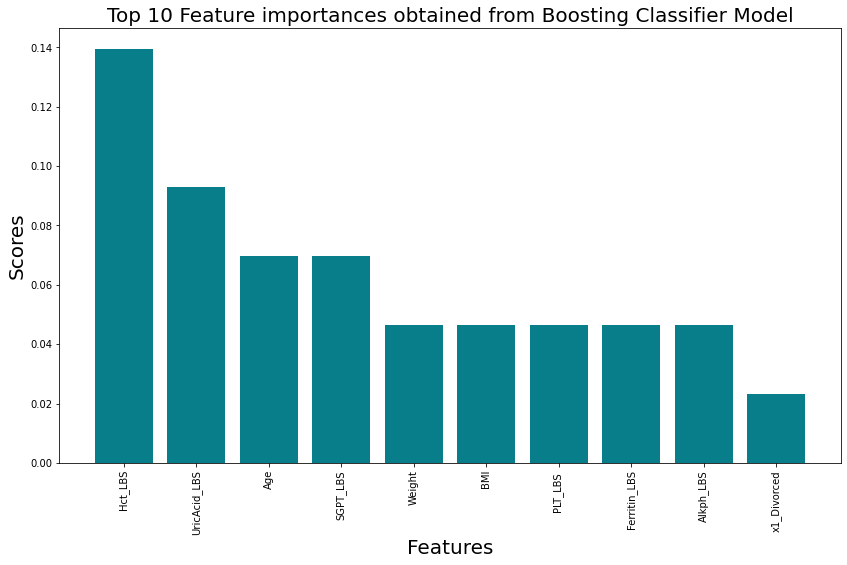

top 10 importancest features are sorted below: 
           Specs     Score
82       Hct_LBS  0.139535
92  UricAcid_LBS  0.093023
73           Age  0.069767
90      SGPT_LBS  0.069767
77        Weight  0.046512
80           BMI  0.046512
83      PLT_LBS   0.046512
84  Ferritin_LBS  0.046512
91     Alkph_LBS  0.046512
2    x1_Divorced  0.023256
------------------------------------------------------------


In [ ]:
print('with Ada Boost Classifier Builtin feature importance calculator')
dfscores = pd.DataFrame(boost.feature_importances_)
dfcolumns = pd.DataFrame(scaled_df.columns)
boost_scores=pd.concat([dfcolumns,dfscores],axis=1)
boost_scores.columns = ['Specs','Score']  #naming the dataframe columns
plt.figure(figsize=(14,8))
plt.bar(x=boost_scores.nlargest(10,'Score')['Specs'], height=boost_scores.nlargest(10,'Score')['Score'], color='#087E8B')
plt.title('Top 10 Feature importances obtained from Boosting Classifier Model', size=20)
plt.xlabel('Features',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()
print('top 10 importancest features are sorted below: ')
print(boost_scores.nlargest(10,'Score'))  #print 10 best features
print("------------------------------------------------------------")


In [ ]:
L= boost_scores.nlargest(10,'Score')['Specs'].to_numpy()
new_df= scaled_df[L]
new_df['target']= scaled_df['target']
undersample = NearMiss(version=2)
# transform the dataset
X, y = undersample.fit_resample(new_df.drop(['target'],axis=1), new_df['target'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20) # 80% training and 20% test

with some random n_estimators like 50 for example:
 Accuracy is : 0.8853503184713376
[[137  15]
 [ 21 141]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       152
           1       0.90      0.87      0.89       162

    accuracy                           0.89       314
   macro avg       0.89      0.89      0.89       314
weighted avg       0.89      0.89      0.89       314

WITH best n_neighbors= 21
Mean Accuracy for the 10 iterations is: 0.8885350318471337
Mean Precision for the 10 iterations is: 0.8944099378881989
Mean Recall for the 10 iterations is: 0.888888888888889
Mean F1 score for the 10 iterations is: 0.891640866873065
Mean AUC for the 10 iterations is: 0.9457033788174141
Mean Precision score for 0 category is: 0.8823529411764707
Mean Precision score for 1 category is: 0.8944099378881989
Mean Recall score for 0 category is: 0.8881578947368421
Mean Recall score for 1 category is: 0.888888888888889
Mean F1 score score for

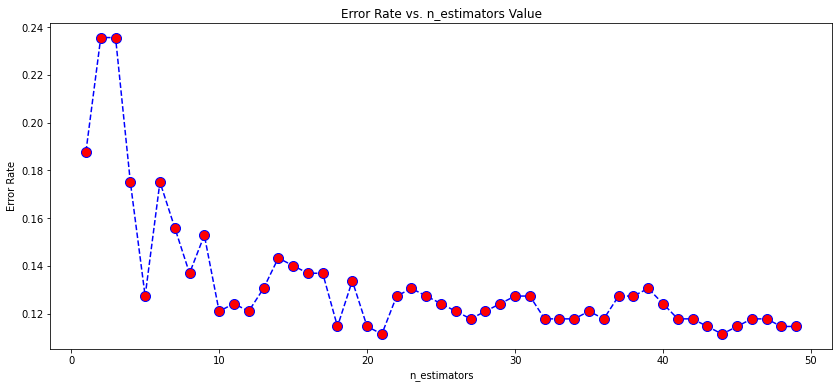

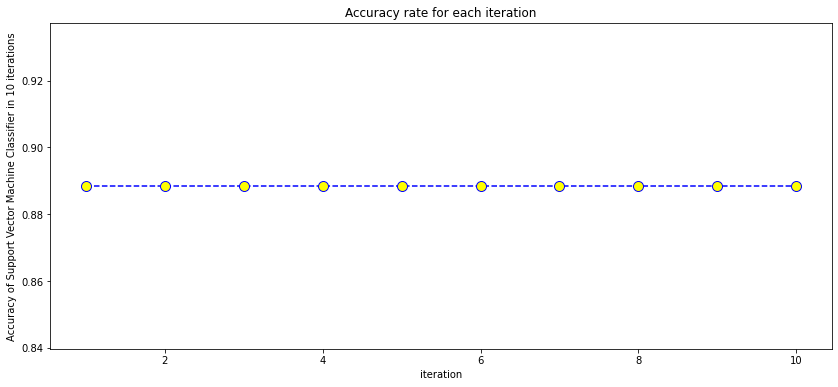

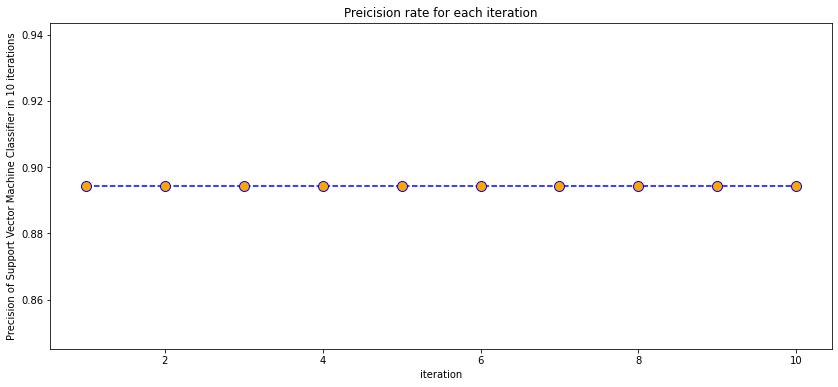

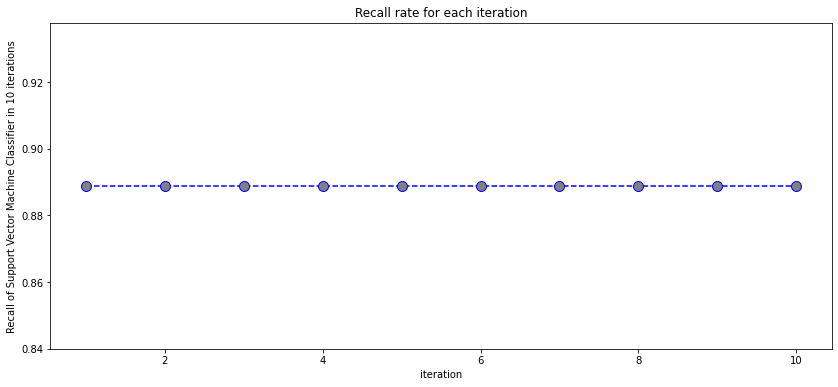

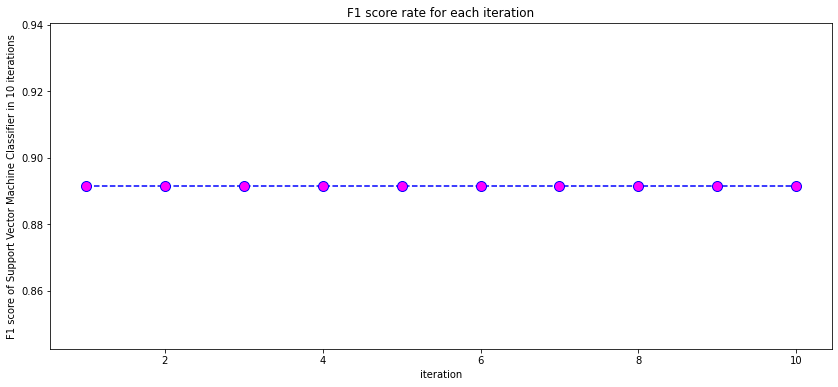

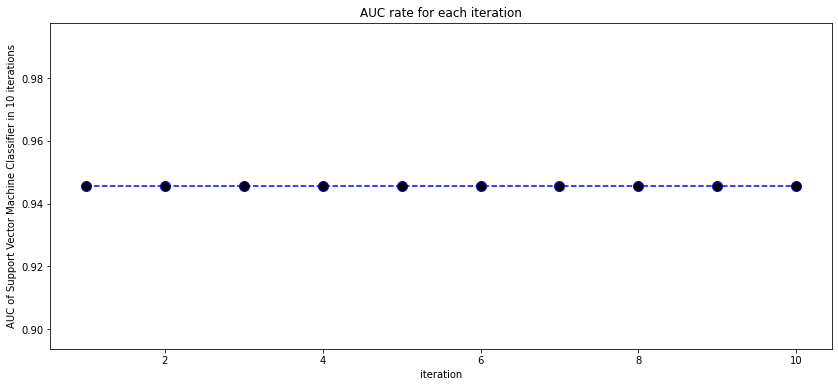

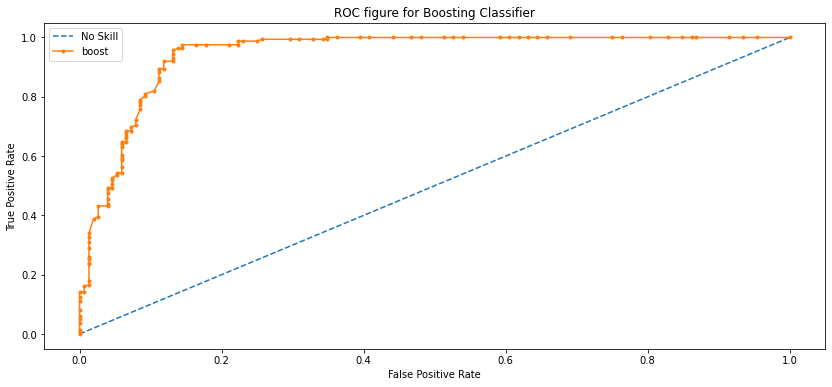

In [ ]:
boost=AdaBoostClassifier(n_estimators=50)
boost.fit(X_train, y_train)
boost_pred = boost.predict(X_test)
acc = accuracy_score(y_test, boost_pred)
print('with some random n_estimators like 50 for example:')
print(" Accuracy is :", acc)
print(confusion_matrix(y_test,boost_pred))
print(classification_report(y_test,boost_pred))
# Find best Parameter set
error_rate=[]
for i in range(1,50):
        iteration_error=[]
        for j in range(4):
            bag = AdaBoostClassifier(n_estimators=i)
            bag.fit(X_train,y_train)
            pred_i = bag.predict(X_test)
            iteration_error.append(np.mean(pred_i != y_test))
        error_rate.append(np.mean(iteration_error))
plt.figure(figsize=(14,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. n_estimators Value')
plt.xlabel('n_estimators')
plt.ylabel('Error Rate')
best_n_estimators= min(range(len(error_rate)), key=error_rate.__getitem__) + 1
print('WITH best n_neighbors=',best_n_estimators )
boost = AdaBoostClassifier(n_estimators=best_n_estimators)
Accuracy=[]
F1=[]
F1_0=[]
F1_1=[]
Precision=[]
AUC=[]
Precision_0=[]
Precision_1=[]
Recall=[]
Recall_0=[]
Recall_1=[]
for i in range(1,11):
  boost.fit(X_train, y_train)
  boost_pred = boost.predict(X_test)
  probs = boost.predict_proba(X_test)
  probs = probs[:, 1]
  auc=roc_auc_score(y_test, probs)
  AUC.append(auc)
  acc = accuracy_score(y_test, boost_pred)
  precision= precision_score(y_test, boost_pred)
  f1=f1_score(y_test, boost_pred)
  recall=recall_score(y_test, boost_pred)
  Accuracy.append(acc)
  Precision.append(precision)
  Recall.append(recall)
  F1.append(f1)
  reports=classification_report(y_test,boost_pred,output_dict=True)
  Precision_0.append(reports['0']['precision'])
  Precision_1.append(reports['1']['precision'])
  F1_0.append(reports['0']['f1-score'])
  F1_1.append(reports['1']['f1-score'])
  Recall_0.append(reports['0']['recall'])
  Recall_1.append(reports['1']['recall'])
Final_scores_after= [round(np.mean(Accuracy),3),round(np.mean(Precision),3),round(np.mean(Recall),3),round(np.mean(F1),3),round(np.mean(AUC),3)]
boost_best_score=Final_scores_after
plt.figure(figsize=(14,6))
plt.plot(range(1,11),Accuracy,color='blue', linestyle='dashed', marker='o',markerfacecolor='yellow', markersize=10)
plt.title('Accuracy rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('Accuracy of Support Vector Machine Classifier in 10 iterations')
print('Mean Accuracy for the 10 iterations is:',np.mean(Accuracy))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),Precision,color='blue', linestyle='dashed', marker='o',markerfacecolor='orange', markersize=10)
plt.title('Preicision rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('Precision of Support Vector Machine Classifier in 10 iterations')
print('Mean Precision for the 10 iterations is:',np.mean(Precision))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),Recall,color='blue', linestyle='dashed', marker='o',markerfacecolor='grey', markersize=10)
plt.title('Recall rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('Recall of Support Vector Machine Classifier in 10 iterations')
print('Mean Recall for the 10 iterations is:',np.mean(Recall))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),F1,color='blue', linestyle='dashed', marker='o',markerfacecolor='magenta', markersize=10)
plt.title('F1 score rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('F1 score of Support Vector Machine Classifier in 10 iterations')
print('Mean F1 score for the 10 iterations is:',np.mean(F1))
plt.figure(figsize=(14,6))
plt.plot(range(1,11),AUC,color='blue', linestyle='dashed', marker='o',markerfacecolor='black', markersize=10)
plt.title('AUC rate for each iteration')
plt.xlabel('iteration')
plt.ylabel('AUC of Support Vector Machine Classifier in 10 iterations')
print('Mean AUC for the 10 iterations is:',np.mean(AUC))
print('Mean Precision score for 0 category is:',np.mean(Precision_0))
print('Mean Precision score for 1 category is:',np.mean(Precision_1))
print('Mean Recall score for 0 category is:',np.mean(Recall_0))
print('Mean Recall score for 1 category is:',np.mean(Recall_1))
print('Mean F1 score score for 0 category is:',np.mean(F1_0))
print('Mean F1 score score for 1 category is:',np.mean(F1_1))
print(" Accuracy is :", acc)
print(confusion_matrix(y_test,boost_pred))
print(classification_report(y_test,boost_pred))

# ROC figure
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
boost_probs = boost.predict_proba(X_test)
# keep probabilities for the positive outcome only
boost_probs = boost_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
boost_auc = roc_auc_score(y_test, boost_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Boosting Classifier: ROC AUC=%.3f' % (boost_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
boost_fpr, boost_tpr, _ = roc_curve(y_test, boost_probs)
# plot the roc curve for the model
plt.figure(figsize=(14,6))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(boost_fpr, boost_tpr, marker='.', label='boost')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC figure for Boosting Classifier')
# show the legend
plt.legend()
# show the plot
plt.show()

before feature selection classifications scores are: [0.834, 0.823, 0.854, 0.839, 0.899]
after feature selection classifications scores are: [0.889, 0.894, 0.889, 0.892, 0.946]


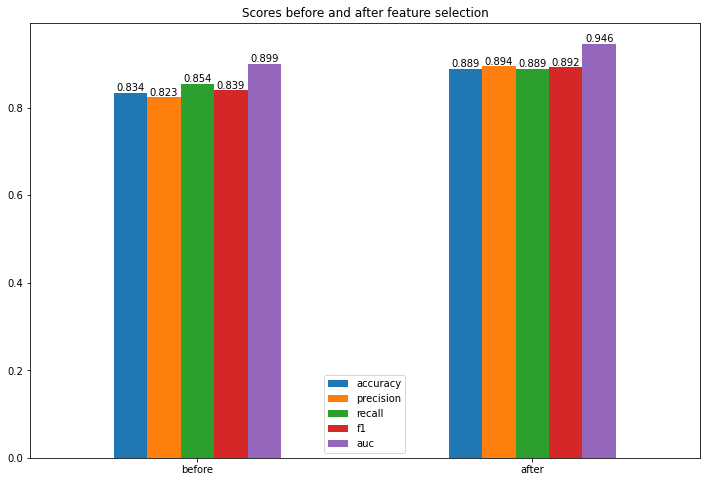

In [ ]:
accs=[Final_scores[0],Final_scores_after[0]]
precisions=[Final_scores[1],Final_scores_after[1]]
recalls=[Final_scores[2],Final_scores_after[2]]
f1s=[Final_scores[3],Final_scores_after[3]]
aucs=[Final_scores[4],Final_scores_after[4]]
index=['before','after']
df = pd.DataFrame({'accuracy': accs,
                   'precision': precisions,'recall': recalls,'f1': f1s,'auc': aucs}, index=index)
ax = df.plot.bar(rot=0,figsize=(12,8),title='Scores before and after feature selection')
for container in ax.containers:
    ax.bar_label(container)
print('before feature selection classifications scores are:' ,Final_scores)
print('after feature selection classifications scores are:' ,Final_scores_after)

In [ ]:
undersample = NearMiss(version=2)
# transform the dataset
X, y = undersample.fit_resample(scaled_df.drop(['target'],axis=1), scaled_df['target'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20) # 80% training and 20% test
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 635, 1: 619})


Deep Learning

Epoch 1/150
9/9 [==============================] - 1s 40ms/step - loss: 0.7954 - accuracy: 0.4734 - val_loss: 0.7327 - val_accuracy: 0.4762
Epoch 2/150
9/9 [==============================] - 0s 10ms/step - loss: 0.7280 - accuracy: 0.4858 - val_loss: 0.6975 - val_accuracy: 0.5000
Epoch 3/150
9/9 [==============================] - 0s 7ms/step - loss: 0.6928 - accuracy: 0.5248 - val_loss: 0.6653 - val_accuracy: 0.5556
Epoch 4/150
9/9 [==============================] - 0s 7ms/step - loss: 0.6624 - accuracy: 0.5762 - val_loss: 0.6383 - val_accuracy: 0.6190
Epoch 5/150
9/9 [==============================] - 0s 8ms/step - loss: 0.6375 - accuracy: 0.6232 - val_loss: 0.6142 - val_accuracy: 0.6429
Epoch 6/150
9/9 [==============================] - 0s 7ms/step - loss: 0.6139 - accuracy: 0.6897 - val_loss: 0.5877 - val_accuracy: 0.6984
Epoch 7/150
9/9 [==============================] - 0s 7ms/step - loss: 0.5903 - accuracy: 0.7261 - val_loss: 0.5629 - val_accuracy: 0.7063
Epoch 8/150
9/9 [========

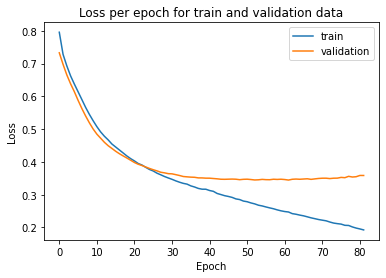

10/10 [==============================] - 0s 2ms/step
Accuracy: 0.859873
Precision: 0.849711
Recall: 0.890909
F1 score: 0.869822
Cohens kappa: 0.718282
ROC AUC: 0.922473
[[123  26]
 [ 18 147]]
[0.86, 0.85, 0.891, 0.87, 0.922]


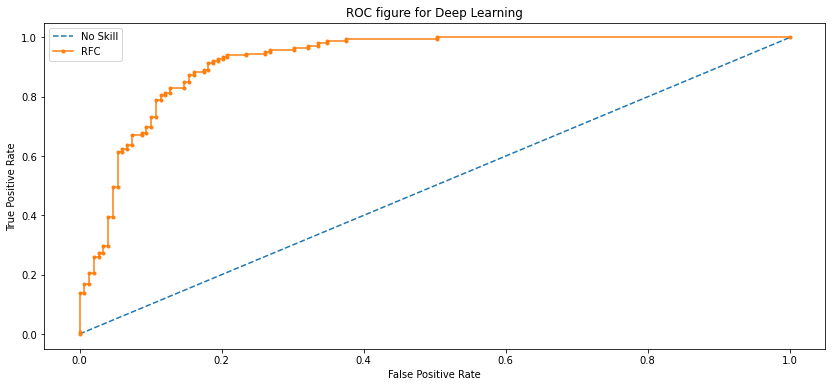

In [ ]:
n_features = X_train.shape[1]
# define model
model = Sequential()


#till now (300 30 30 , tanh tanh relu, patience 6)
# and (300 60 60 30 relu, patience 40)
# and (240 60 60 10 relu, patience 30)
# and (90 30 30 10 relu, patience 10, val split 0.1)
# and (90 60 30 10 relu, patience 10, val split 0.1)
# and (60 30 10 relu, patience 10, val split 0.1)
# baraye shekl :(30 30 10 relu, patience 10, val split 0.1)
# baraye shekl :(18 12 6 relu, patience 10, val split 0.1)
# behtarin ham shekl ham natije: (18 9 6 relu, patience 10, val split 0.1)
# behtarin ham shekl ham natije: (18 6 3 relu, patience 10, val split 0.1)
# behtarin ham shekl ham natije: (14 7 4 relu, patience 10, val split 0.1)
# behtarin ham shekl ham natije: (10 4 4 relu, patience 10, val split 0.1)
#model.add(Dense(6, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(12, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(12, activation='relu', kernel_initializer='he_normal'))
#model.add(Dense(4, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
es = EarlyStopping(monitor='val_loss', mode='min', verbose= 1, patience= 20)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
history= model.fit(X_train, y_train ,validation_split=0.1,epochs=150, batch_size=128, callbacks= [es], verbose=1)
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=1)
print('Test Accuracy: %.3f' % acc)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per epoch for train and validation data')
plt.legend()
plt.show()
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes =np.round(model.predict(X_test),0)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
# kappa
ns_probs = [0 for _ in range(len(y_test))]
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)
Final_scores= [round(np.mean(accuracy),3),round(np.mean(precision),3),round(np.mean(recall),3),round(np.mean(f1),3),round(np.mean(auc),3)]
print(Final_scores)
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, yhat_probs)
# plot the roc curve for the model
plt.figure(figsize=(14,6))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='RFC')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC figure for Deep Learning')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
print('top 10 importancest features are sorted below: ')
print(featureScores.nlargest(11,'Score'))  #print 5 best features
print("------------------------------------------------------------")
L= featureScores.nlargest(10,'Score')['Specs'].to_numpy()
new_df= scaled_df[L]
new_df['target']= scaled_df['target']
undersample = NearMiss(version=2)
# transform the dataset
X, y = undersample.fit_resample(new_df.drop(['target'],axis=1), new_df['target'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20) # 70% training and 30% test

top 10 importancest features are sorted below: 
                 Specs     Score
82             Hct_LBS  0.202235
81              Hb_LBS  0.107076
92        UricAcid_LBS  0.048533
0                 x0_F  0.044932
84        Ferritin_LBS  0.042572
90            SGPT_LBS  0.037508
1                 x0_M  0.035947
77              Weight  0.033430
78  Waistcircumference  0.025935
91           Alkph_LBS  0.025347
83            PLT_LBS   0.024867
------------------------------------------------------------


Epoch 1/200
9/9 [==============================] - 1s 43ms/step - loss: 1.3278 - accuracy: 0.4973 - val_loss: 1.2150 - val_accuracy: 0.5238
Epoch 2/200
9/9 [==============================] - 0s 9ms/step - loss: 1.1911 - accuracy: 0.4867 - val_loss: 1.0974 - val_accuracy: 0.5238
Epoch 3/200
9/9 [==============================] - 0s 9ms/step - loss: 1.0706 - accuracy: 0.4778 - val_loss: 0.9963 - val_accuracy: 0.5159
Epoch 4/200
9/9 [==============================] - 0s 9ms/step - loss: 0.9695 - accuracy: 0.4699 - val_loss: 0.9097 - val_accuracy: 0.4841
Epoch 5/200
9/9 [==============================] - 0s 8ms/step - loss: 0.8831 - accuracy: 0.4610 - val_loss: 0.8370 - val_accuracy: 0.4444
Epoch 6/200
9/9 [==============================] - 0s 8ms/step - loss: 0.8104 - accuracy: 0.4628 - val_loss: 0.7769 - val_accuracy: 0.4365
Epoch 7/200
9/9 [==============================] - 0s 9ms/step - loss: 0.7511 - accuracy: 0.4973 - val_loss: 0.7281 - val_accuracy: 0.4921
Epoch 8/200
9/9 [=========

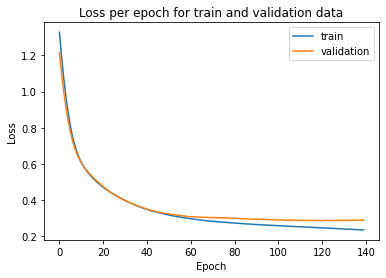

10/10 [==============================] - 0s 3ms/step
Accuracy: 0.920382
Precision: 0.885714
Recall: 0.968750
F1 score: 0.925373
Cohens kappa: 0.840415
ROC AUC: 0.922930
[[134  20]
 [  5 155]]
[0.92, 0.886, 0.969, 0.925, 0.923]


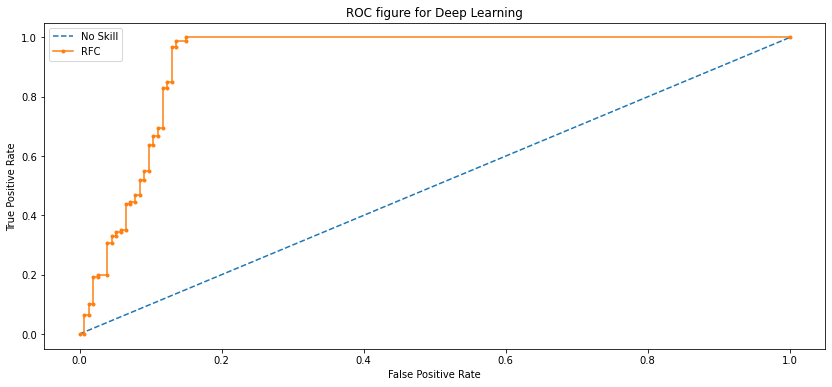

In [ ]:
n_features = X_train.shape[1]
# define model
model = Sequential()


#till now (300 30 30 , tanh tanh relu, patience 6)
# and (300 60 60 30 relu, patience 40)
# and (240 60 60 10 relu, patience 30)
# and (90 30 30 10 relu, patience 10, val split 0.1)
# and (90 60 30 10 relu, patience 10, val split 0.1)
# and (60 30 10 relu, patience 10, val split 0.1)
# baraye shekl :(30 30 10 relu, patience 10, val split 0.1)
# baraye shekl :(18 12 6 relu, patience 10, val split 0.1)
# behtarin ham shekl ham natije: (18 9 6 relu, patience 10, val split 0.1)
# behtarin ham shekl ham natije: (18 6 3 relu, patience 10, val split 0.1)
# behtarin ham shekl ham natije: (14 7 4 relu, patience 10, val split 0.1)
# behtarin ham shekl ham natije: (10 4 4 relu, patience 10, val split 0.1)
#model.add(Dense(12, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
#model.add(Dense(3, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
es = EarlyStopping(monitor='val_loss', mode='min', verbose= 1, patience= 20)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
history= model.fit(X_train, y_train ,validation_split=0.1,epochs=200, batch_size=128, callbacks= [es], verbose= 1 )
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = np.round(model.predict(X_test),0)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=1)
print('Test Accuracy: %.3f' % acc)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per epoch for train and validation data')
plt.legend()
plt.show()
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes =np.round(model.predict(X_test),0)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
# kappa
ns_probs = [0 for _ in range(len(y_test))]
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)
Final_scores= [round(np.mean(accuracy),3),round(np.mean(precision),3),round(np.mean(recall),3),round(np.mean(f1),3),round(np.mean(auc),3)]
print(Final_scores)
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, yhat_probs)
# plot the roc curve for the model
plt.figure(figsize=(14,6))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='RFC')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC figure for Deep Learning')
# show the legend
plt.legend()
# show the plot
plt.show()

before feature selection classifications scores are: [0.834, 0.783, 0.907, 0.84, 0.897]
after feature selection classifications scores are: [0.898, 0.875, 0.939, 0.906, 0.939]


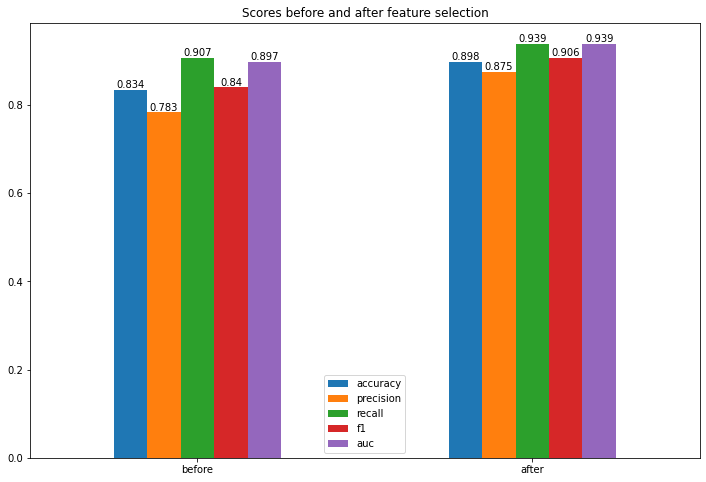

In [ ]:
accs=[Final_scores[0],Final_scores_after[0]]
precisions=[Final_scores[1],Final_scores_after[1]]
recalls=[Final_scores[2],Final_scores_after[2]]
f1s=[Final_scores[3],Final_scores_after[3]]
aucs=[Final_scores[4],Final_scores_after[4]]
index=['before','after']
df = pd.DataFrame({'accuracy': accs,
                   'precision': precisions,'recall': recalls,'f1': f1s,'auc': aucs}, index=index)
ax = df.plot.bar(rot=0,figsize=(12,8),title='Scores before and after feature selection')
for container in ax.containers:
    ax.bar_label(container)
print('before feature selection classifications scores are:' ,Final_scores)
print('after feature selection classifications scores are:' ,Final_scores_after)

<Figure size 1296x1008 with 0 Axes>

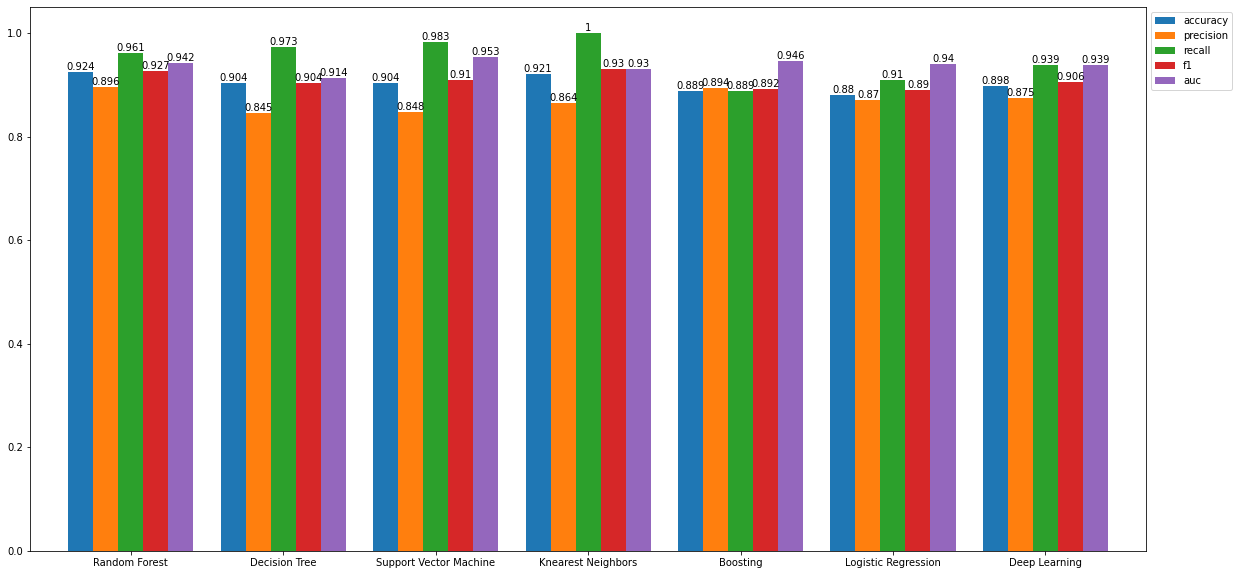

In [ ]:
accs=[rf_best_score[0],dt_best_score[0],svc_best_score[0],knn_best_score[0],boost_best_score[0],round(lr_best_score[0],2),dl_best_score[0]]
precisions=[rf_best_score[1],dt_best_score[1],svc_best_score[1],knn_best_score[1],boost_best_score[1],round(lr_best_score[1],2),dl_best_score[1]]
recalls=[rf_best_score[2],dt_best_score[2],svc_best_score[2],knn_best_score[2],boost_best_score[2],round(lr_best_score[2],2),dl_best_score[2]]
f1s=[rf_best_score[3],dt_best_score[3],svc_best_score[3],round(knn_best_score[3],2),boost_best_score[3],round(lr_best_score[3],2),dl_best_score[3]]
aucs=[rf_best_score[4],dt_best_score[4],svc_best_score[4],round(knn_best_score[4],2),boost_best_score[4],round(lr_best_score[4],2),dl_best_score[4]]
index=['Random Forest','Decision Tree','Support Vector Machine','Knearest Neighbors','Boosting','Logistic Regression','Deep Learning']
df = pd.DataFrame({'accuracy': accs,
                   'precision': precisions,'recall': recalls,'f1': f1s,'auc': aucs}, index=index)
plt.figure(figsize=(18,14))
ax = df.plot.bar(rot=0,figsize=(20, 10),width=0.82)
plt.legend(bbox_to_anchor=(1.0, 1.0))

for container in ax.containers:
    ax.bar_label(container)